In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# EDA:

In [5]:
df= pd.read_csv('C:\\Users\\Divya\\OneDrive\\Desktop\\Time series\\Sparkling.csv')

In [6]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [7]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [8]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [9]:
# Adding the time stamp to the data frame

df['Time_Stamp'] = pd.DataFrame(date,columns=['Year-Month'])
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [10]:
# Setting Time_stamp as an index and dropping the YearMonth column from the dataset

df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [11]:
df.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [12]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [13]:
df.dtypes

Sparkling    int64
dtype: object

Now we have the data ready for time series analysis.

# Plot the Time Series to understand the behaviour of the data:

In [14]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

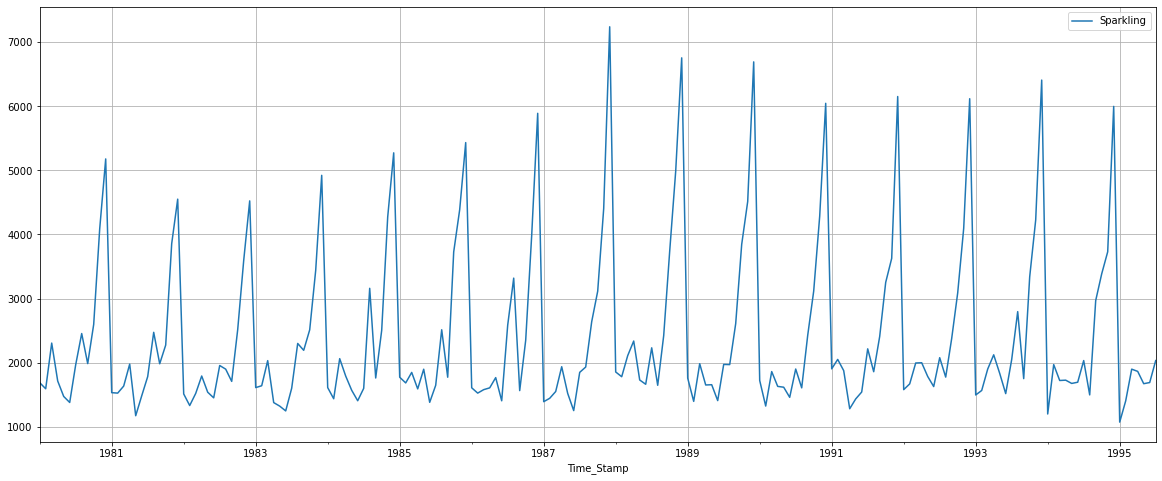

In [15]:
df.plot();
plt.grid()

From the plot, we can see that there is no trend involved but there is a seasonal pattern. Since this is a monthly sales data of wine, we can expect certain amount of seasonality in the data.

# Descriptive Statistics:

In [16]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

* There are total 187 observations in the dataset. There are no null values or missing values in the data. 

* The data includes monthly sales of 'Sparkling wine' with dates ranging from Jan 1980 to July 1995.

* The average amount of sales is 2402. The minimum amount of sales is observed as 1070 on any given day where as the maximum went upto 7242.

* From the above table, it indicates that there is seasonality in the data and the sales of wine went upto 7242 at certain time of the year.

Plot a boxplot to understand the spread of sales across different years and within different months across years:

# Yearly Boxplot:

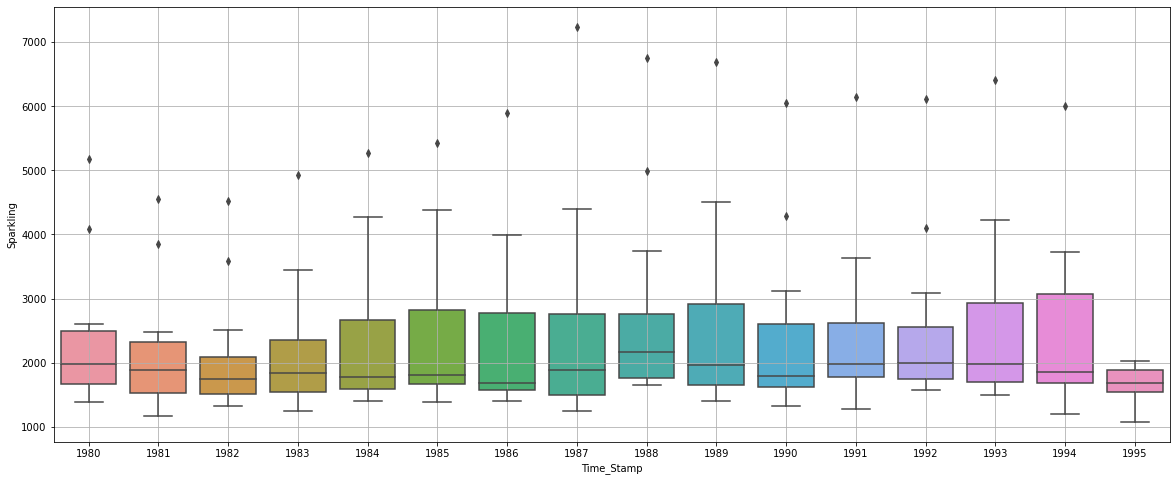

In [17]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

* From the above plot, we can infer that the maximum sales of wine was observed in year 1988.

* There are many outliers in the data.

* The sales of the wine showed gradual decline from year 1980 till 1986. The sales again increased in 1987 and 1988. 

* From 1989 till 1995 there was slight increase and decrease in the sales. The lowest number of sales was observed in year 1995. But for the year 1995, the data provided is only for 7 months from jan to july. Whereas for all other years, we have data for all the months.

* The sales almost remained constant from year 1991 till 1993.

# Monthly Boxplot:

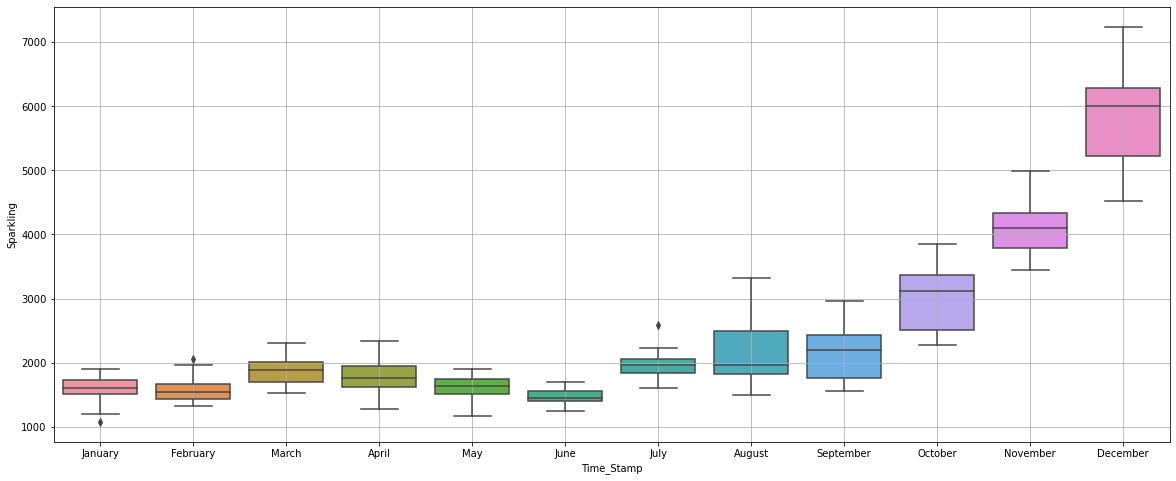

In [15]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

* From the above graph, we can infer that, there is seasonality in the data.

* The sales in the first half of the year are less compared to second half of the year across all the years.

* The sales of the wine increase from August to December every year.

* The highest sales are observed in December every year. Since december is a festival month, the sales of that month are exceptionally high compared to other months of the year.

* Hence, business can increase the production and cost of the wine accordingly to increase their profit margin.

* There are very few outliers in the data.

# Plot a time series monthplot to understand the spread of sales across different years and within different months across years:

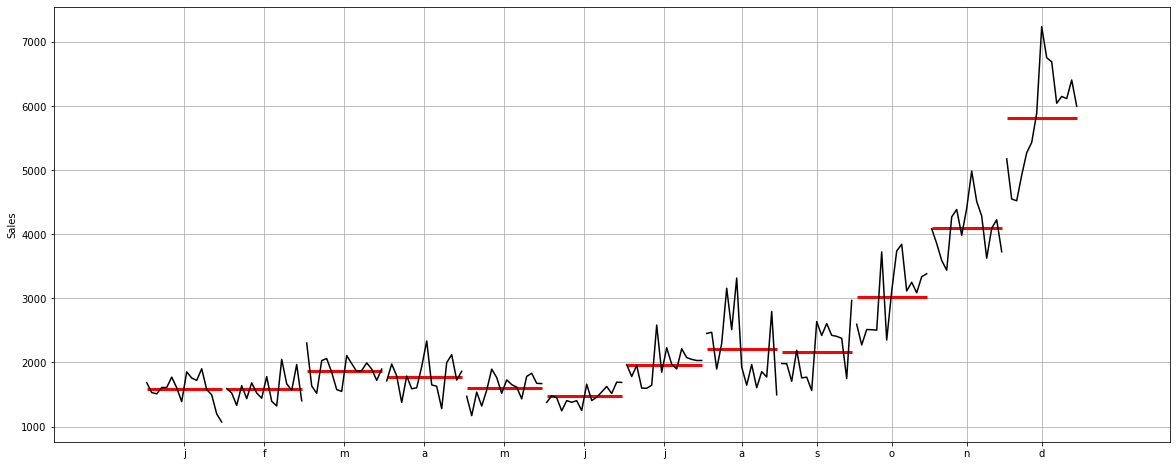

In [16]:
from statsmodels.graphics.tsaplots import month_plot
rcParams['figure.figsize'] = 20,8

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Wine Sales' in this case) across various months. The red line is the median value.

# Plot a graph of monthly RetailSales across years:

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

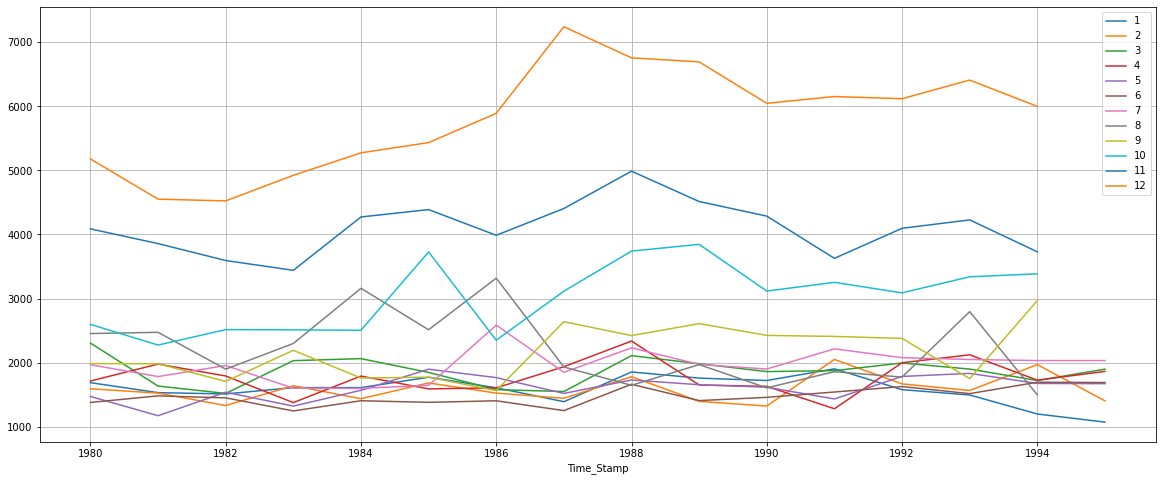

In [18]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

The above graph shows that, wine sales are exceptionally high in October, November and December across all the years.

# Plot the Empirical Cumulative Distribution:

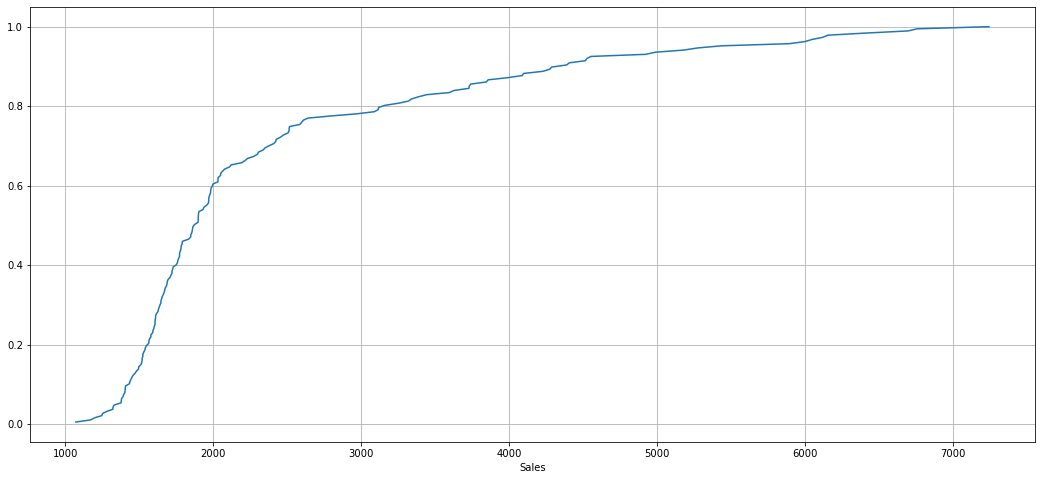

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

* This particular graph tells us what percentage of data points refer to what number of Sales.

* The ECDF essentially allows us to plot a feature of our data in order from least to greatest and see the whole feature as if is distributed across the data set.

* Above graph says that, 60 percent of the observations have sales less than 2000.

* 79 percent of observations have sales less than 3000. Almost 86 percent of observations have sales than 4000.

# Plot the average RetailSales per month and the month on month percentage change of RetailSales:

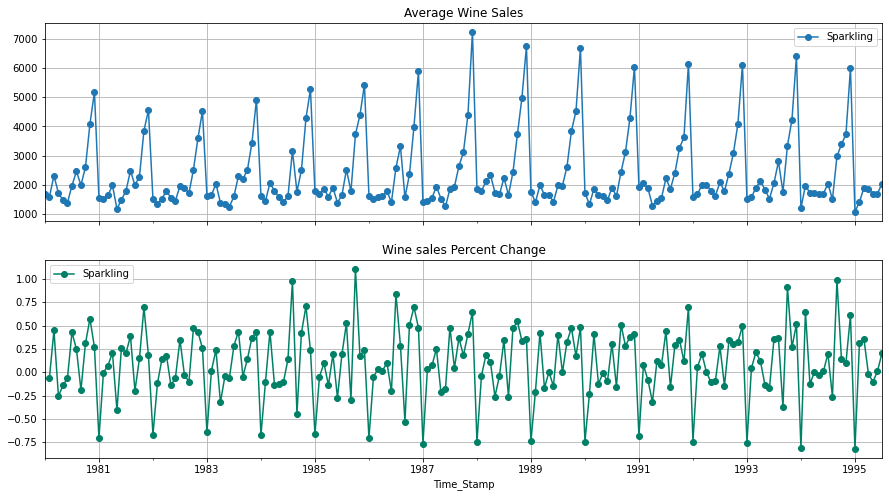

In [20]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine sales Percent Change",grid=True)

The above two graphs tells us the Average 'wine sales' and the Percentage change of 'wine sales' with respect to the time.

# Decompose the Time Series and plot the different components:

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition

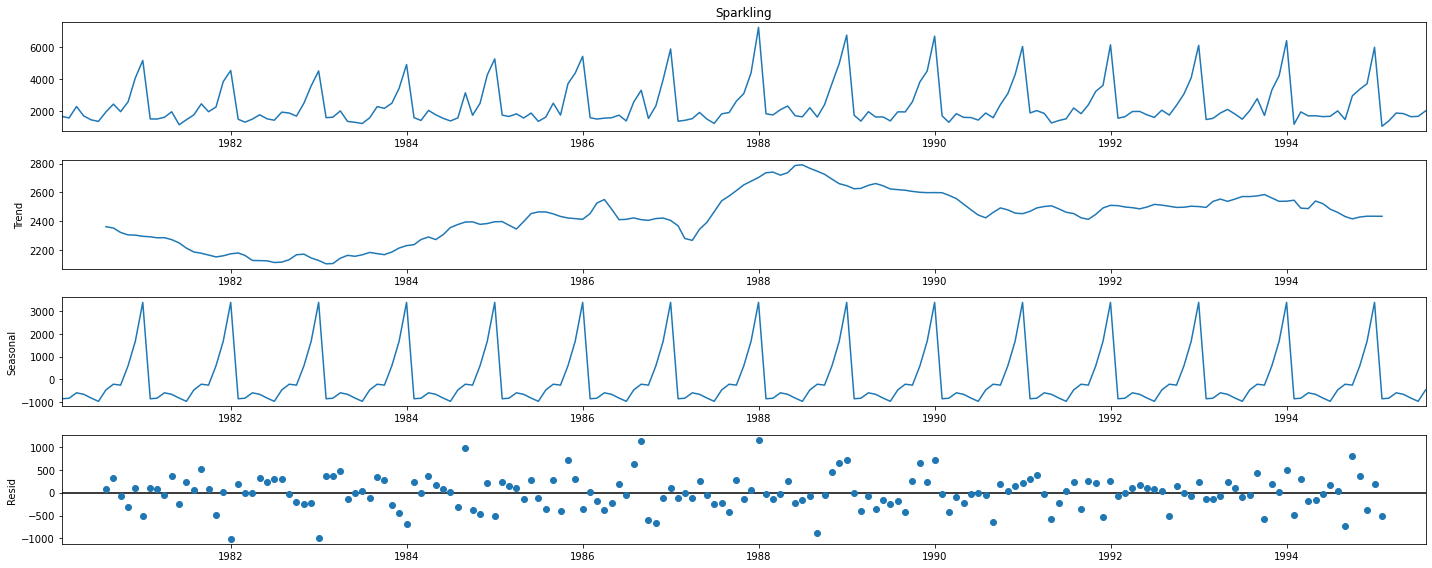

In [22]:
decomposition_additive = seasonal_decompose(df['Sparkling'],model='additive')
decomposition_additive.plot();

In [23]:
trend_additive = decomposition_additive.trend
seasonality_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

print('Trend','\n',trend_additive.head(12),'\n')
print('Seasonality','\n',seasonality_additive.head(12),'\n')
print('Residual','\n',residual_additive.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

We see that there is no trend in the data. There is seasonality. The residuals or error component are scattered around zero and have high standard deviation.

# Multiplicative Decomposition

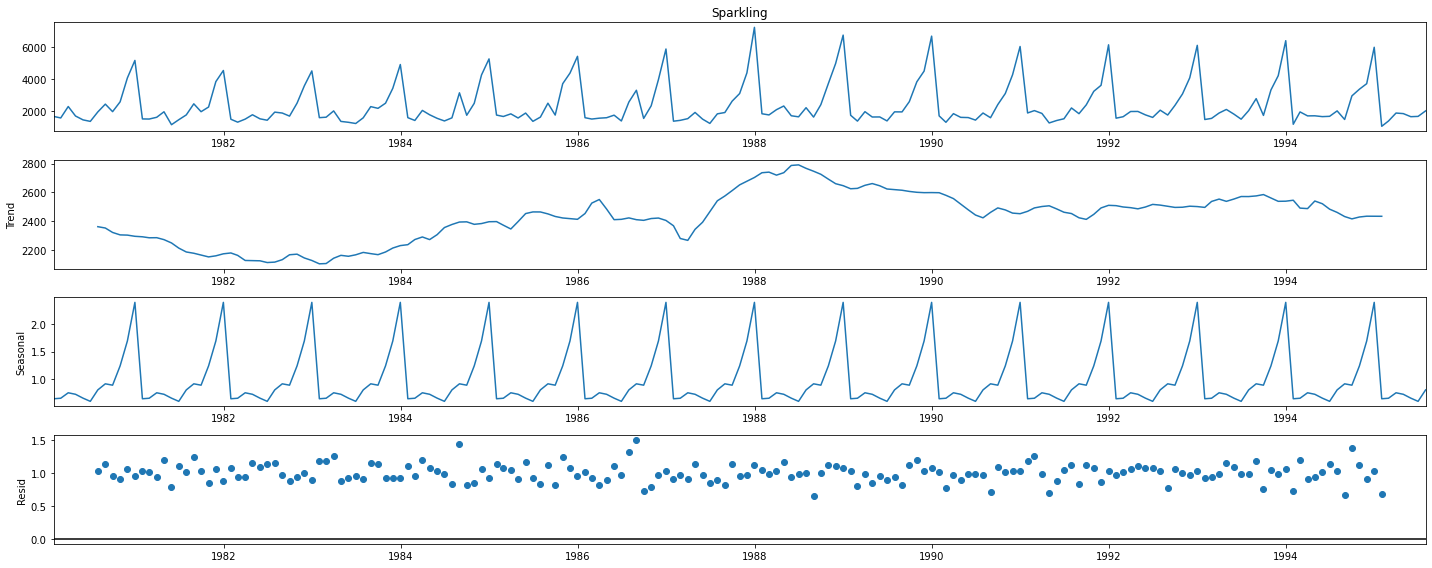

In [24]:
decomposition_multiplicative = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition_multiplicative.plot();

In [29]:
trend_multiplicative = decomposition_multiplicative.trend
seasonality_multiplicative = decomposition_multiplicative.seasonal
residual_multiplicative = decomposition_multiplicative.resid

print('Trend','\n',trend_multiplicative.head(12),'\n')
print('Seasonality','\n',seasonality_multiplicative.head(12),'\n')
print('Residual','\n',residual_multiplicative.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

We see that residuals or error component is scattered around point 1 but little bit more aligned compared to additive model.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [18]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [19]:
## This is to display multiple data frames from one cell

from IPython.display import display

In [20]:
print('First few rows of Training Data')
display(train.head())

print('Last few rows of Training Data')
display(train.tail())

print('First few rows of Test Data')
display(test.head())

print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [21]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


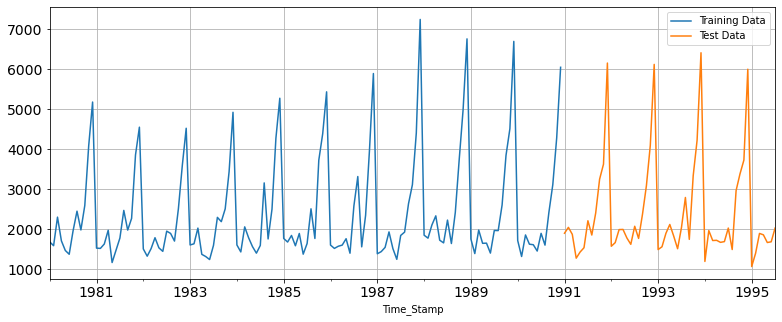

In [22]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics:

# Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [23]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [24]:
LR_train = train.copy()
LR_test = test.copy()

In [25]:
LR_train['time'] = train_time
LR_test['time'] = test_time

print('First few rows of Training Data','\n',LR_train.head(),'\n')
print('Last few rows of Training Data','\n',LR_train.tail(),'\n')
print('First few rows of Test Data','\n',LR_test.head(),'\n')
print('Last few rows of Test Data','\n',LR_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use linear regression to build the model on the training data and test the model on the test data.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
LR = LinearRegression()

In [28]:
LR.fit(LR_train[['time']],LR_train['Sparkling'].values)

LinearRegression()

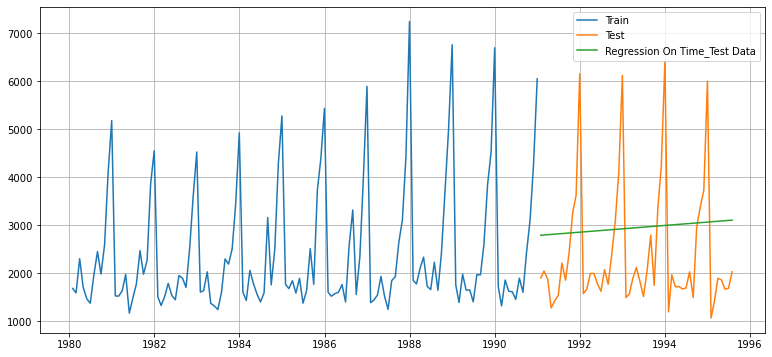

In [29]:
test_predictions_LR = LR.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_predictions_LR

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

# Model Evaluation

In [30]:
## Test Data - RMSE

rmse_LR_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_LR,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [31]:
results_df = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['RegressionOnTime'])
results_df

Test RMSE
RegressionOnTime  1389.135175

# Model 2: Naive Approach

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today, therefore the prediction for day after tomorrow is also today.

In [32]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [33]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

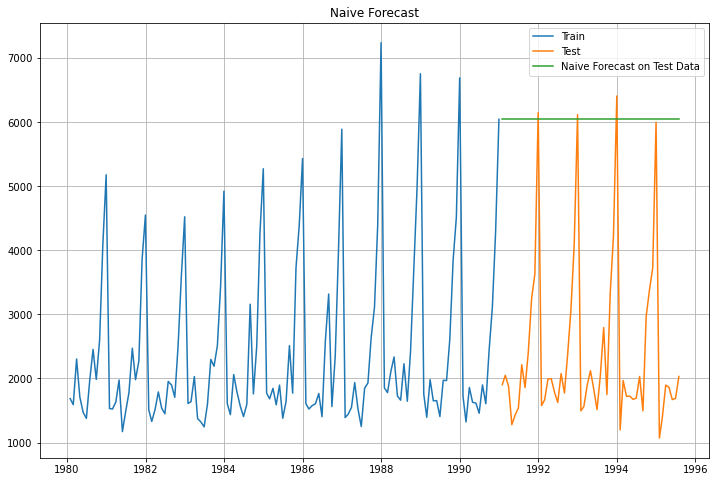

In [34]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [35]:
## Test Data - RMSE

rmse_naive_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naive_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [36]:
results_df2 = pd.DataFrame({'Test RMSE': [rmse_naive_test]},index=['NaiveModel'])

results_df = pd.concat([results_df, results_df2])
results_df

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

# Model 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [37]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [38]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

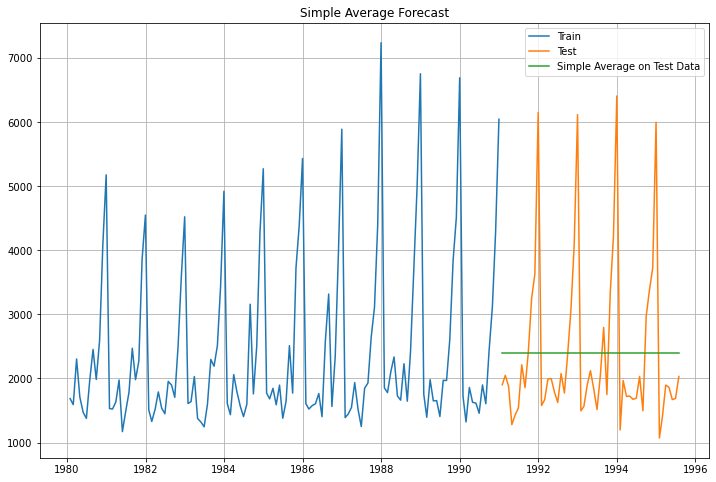

In [39]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [40]:
## Test Data - RMSE 

rmse_SimpleAverage_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_SimpleAverage_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [41]:
results_df3 = pd.DataFrame({'Test RMSE': [rmse_SimpleAverage_test]},index=['SimpleAverageModel'])

results_df = pd.concat([results_df, results_df3])
results_df

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

# Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [42]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

# Trailing moving averages

In [43]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

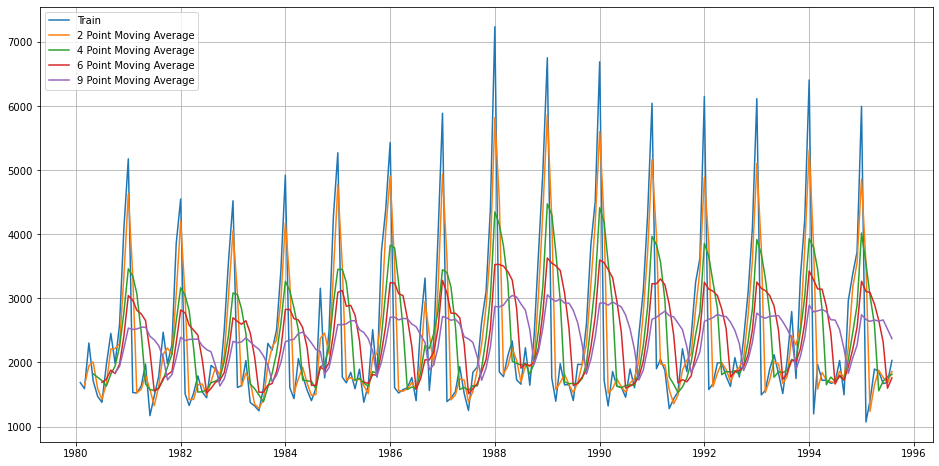

In [44]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [45]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

In [46]:
print(trailing_MovingAverage_train.shape)
print(trailing_MovingAverage_test.shape)

(132, 5)
(55, 5)


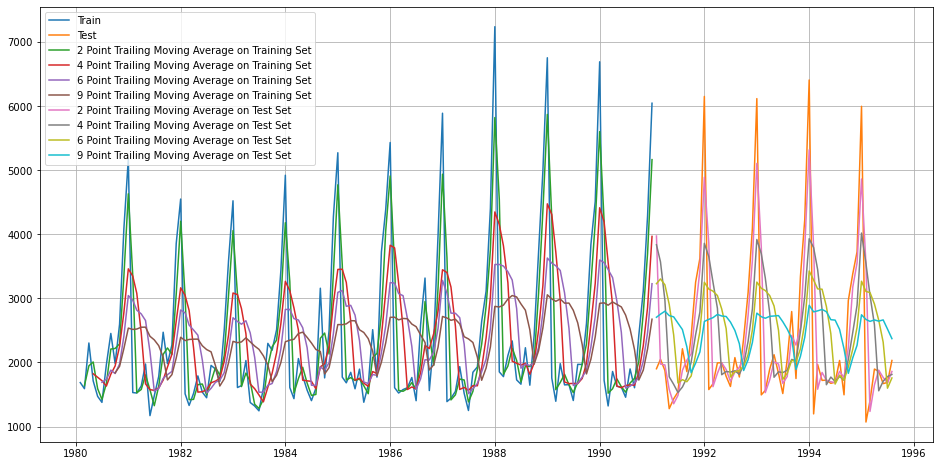

In [47]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation on test data

In [48]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_ma_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_ma_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_ma_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_ma_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_ma_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_ma_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_ma_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_ma_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [49]:
results_df4 = pd.DataFrame({'Test RMSE': [rmse_ma_test_2,rmse_ma_test_4
                                          ,rmse_ma_test_6,rmse_ma_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_df = pd.concat([results_df, results_df4])
results_df

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

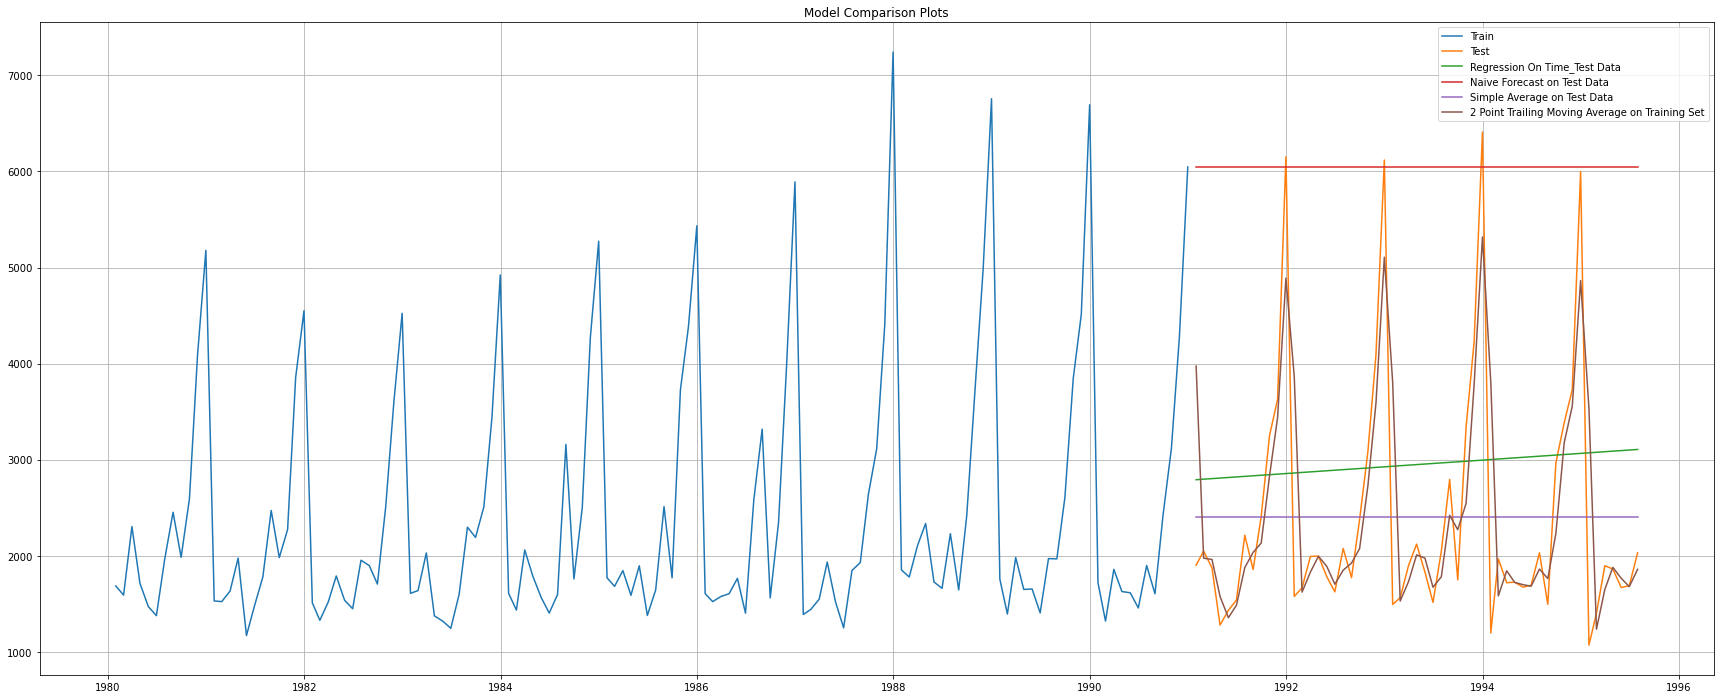

In [50]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Model 5: Simple Exponential Smoothing (SES)

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [52]:
SES_train = train.copy()
SES_test = test.copy()

In [53]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [54]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [55]:
model_SES_autofit.params

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

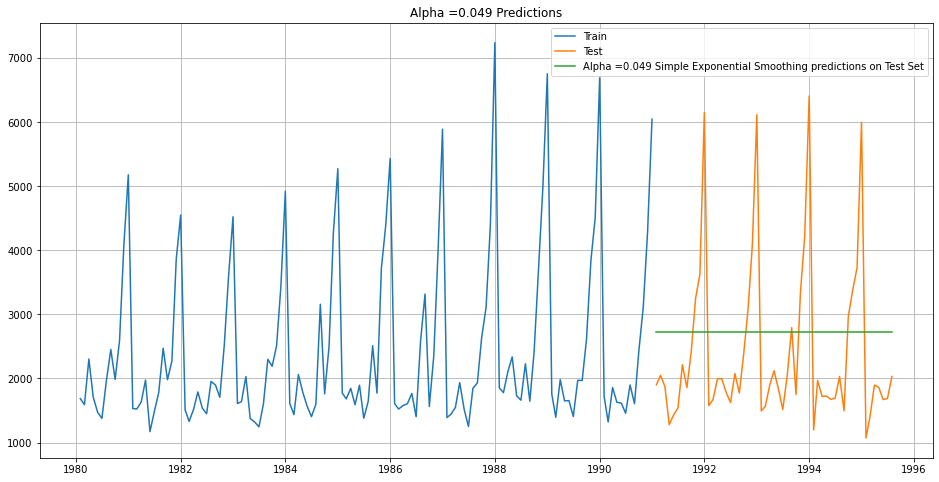

In [57]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

Model Evaluation for  𝛼  = 0.049 : Simple Exponential Smoothing

In [58]:
## Test Data

rmse_SES_test= metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_test))


For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [59]:
results_df5 = pd.DataFrame({'Test RMSE': [rmse_SES_test]},index=['Alpha=0.049,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df5])
results_df

Test RMSE
RegressionOnTime                        1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.049,SimpleExponentialSmoothing  1316.034674

Setting different alpha values:
    
The higher the alpha value, more weightage is given to the most recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [61]:
## First we will define an empty dataframe to store our values from the loop

results_df6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
results_df6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [62]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    results_df6 = results_df6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

# Model Evaluation

In [63]:
results_df6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

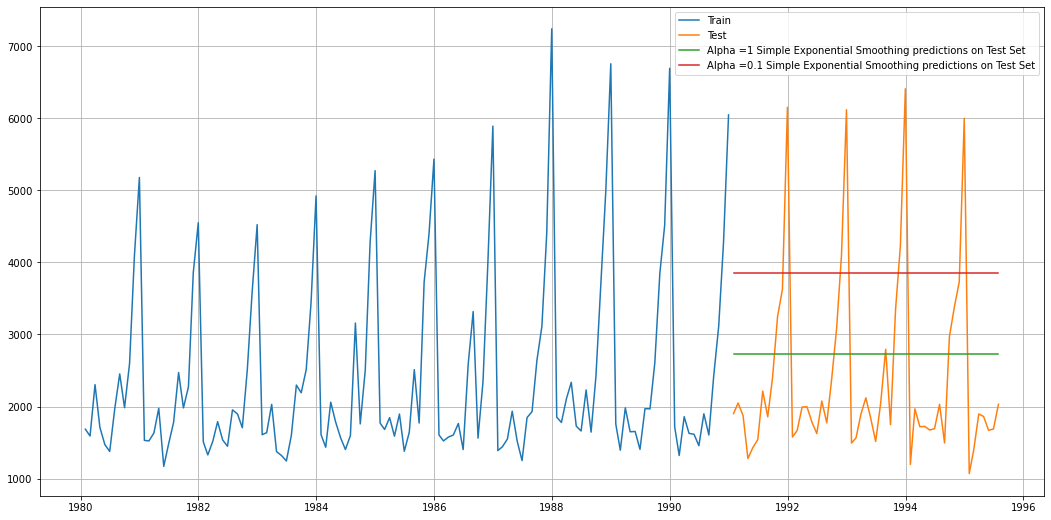

In [64]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [65]:
results_df6_SES = pd.DataFrame({'Test RMSE': [results_df6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

results_df= pd.concat([results_df, results_df6_SES])
results_df

Test RMSE
RegressionOnTime                        1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.049,SimpleExponentialSmoothing  1316.034674
Alpha=0.1,SimpleExponentialSmoothing    1375.393398

# Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [66]:
DES_train = train.copy()
DES_test = test.copy()

In [67]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [68]:
## First we will define an empty dataframe to store our values from the loop

results_df7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
results_df7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [69]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_DES_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_DES_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        results_df7 = results_df7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

In [70]:
results_df7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [71]:
results_df7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

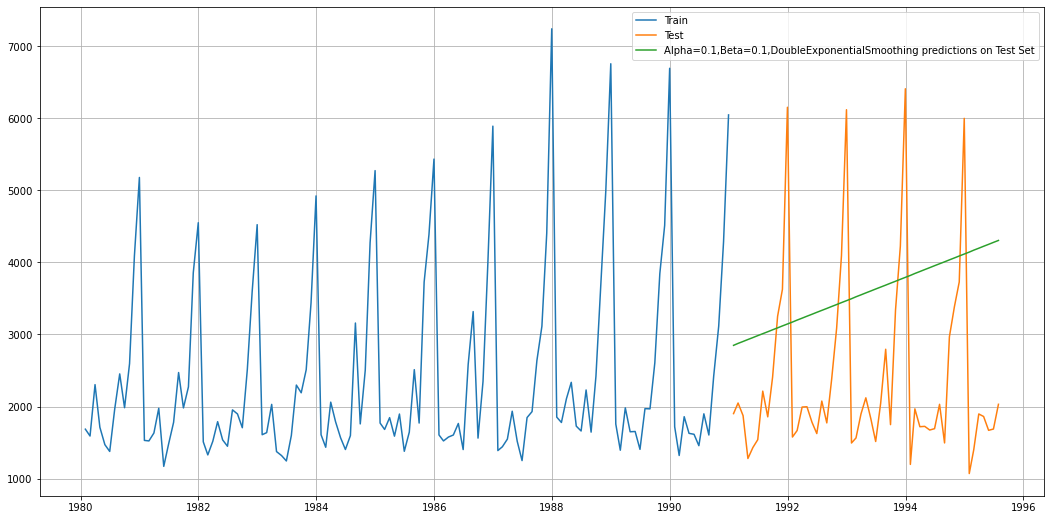

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [73]:
results_df7_DES = pd.DataFrame({'Test RMSE': [results_df7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df7_DES])
results_df

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
9pointTrailingMovingAverage                    1346.278315
Alpha=0.049,SimpleExponentialSmoothing         1316.034674
Alpha=0.1,SimpleExponentialSmoothing           1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

# Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [74]:
TES_train = train.copy()
TES_test = test.copy()

In [75]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [76]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [77]:
model_TES_autofit.params

{'smoothing_level': 0.11057044018305404,
 'smoothing_trend': 0.06076609768412894,
 'smoothing_seasonal': 0.39187601902826213,
 'damping_trend': nan,
 'initial_level': 1621.806699459997,
 'initial_trend': -8.175193580026457,
 'initial_seasons': array([1.07304448, 1.02730389, 1.39469706, 1.20333193, 0.98008967,
        0.97664181, 1.39261648, 1.70888984, 1.37519684, 1.81953245,
        2.82880203, 3.59142504]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1578.528263
1991-02-28       2049   1336.087202
1991-03-31       1874   1747.686817
1991-04-30       1279   1632.972086
1991-05-31       1432   1525.031468

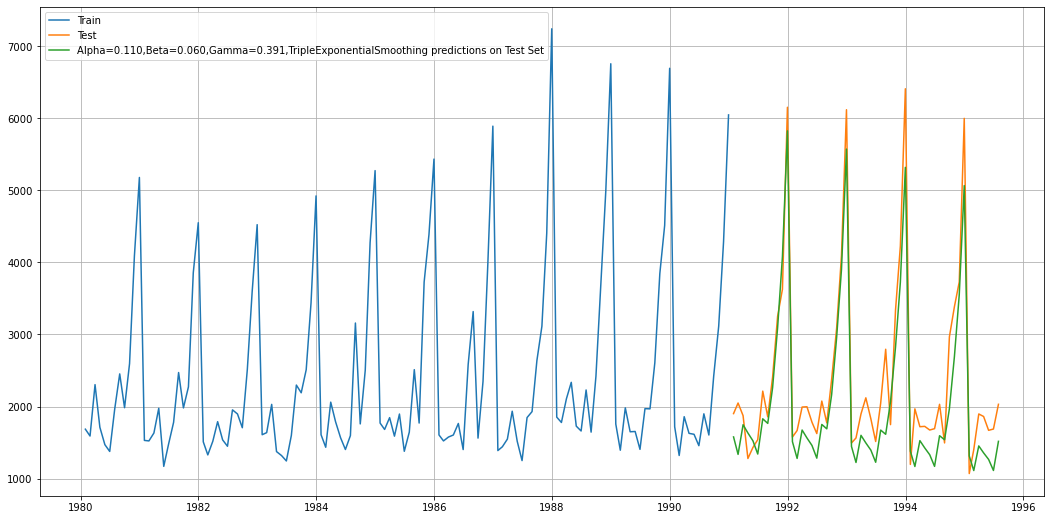

In [79]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [80]:
## Test Data

rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.110,Beta=0.060,Gamma=0.391, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES_test))

For Alpha=0.110,Beta=0.060,Gamma=0.391, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 463.502


In [81]:
results_df8 = pd.DataFrame({'Test RMSE': [rmse_TES_test]}
                           ,index=['Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df8])
results_df

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExpone...   463.501976

In [82]:
## First we will define an empty dataframe to store our values from the loop

results_df_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_df_TES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [83]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            results_df_TES = results_df_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

In [84]:
results_df_TES

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.1          0.1           0.1     388.351959  5.799963e+02
1             0.1          0.1           0.2     372.002250  6.174690e+02
2             0.1          0.1           0.3     364.222099  6.387802e+02
3             0.1          0.1           0.4     362.590749  6.447620e+02
4             0.1          0.1           0.5     365.655545  6.411226e+02
..            ...          ...           ...            ...           ...
995           1.0          1.0           0.6  153394.791827  7.989790e+05
996           1.0          1.0           0.7   94040.964957  1.074413e+06
997           1.0          1.0           0.8  102196.953755  5.010607e+06
998           1.0          1.0           0.9   77924.294413  4.318265e+05
999           1.0          1.0           1.0  239917.432848  1.254280e+05

[1000 rows x 5 columns]

In [85]:
results_df_TES.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
301           0.4          0.1           0.2  389.772245  336.715250
211           0.3          0.2           0.2  395.529174  350.145204
110           0.2          0.2           0.1  405.333164  352.571689
200           0.3          0.1           0.1  394.630053  352.607849
20            0.1          0.3           0.1  414.423963  354.534561

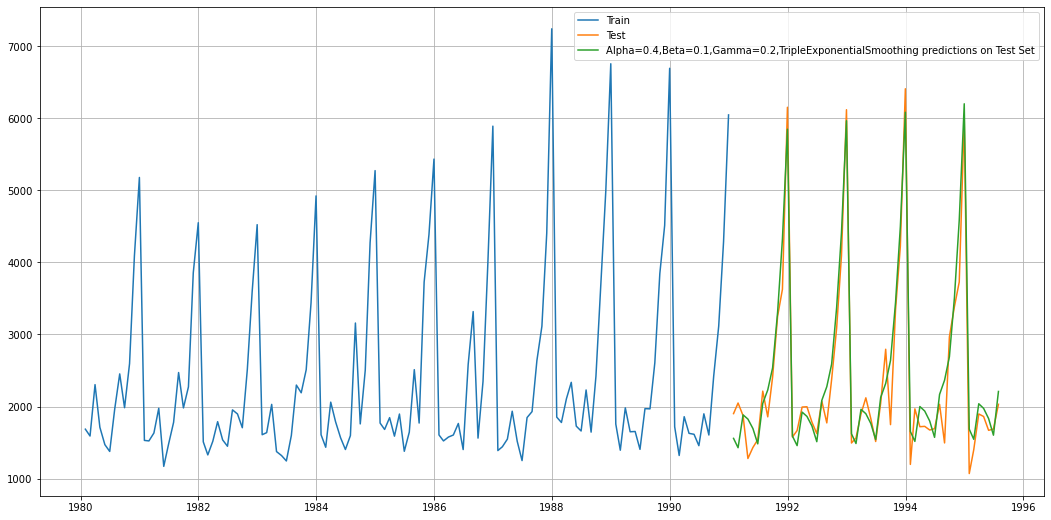

In [86]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [89]:
results_TES = pd.DataFrame({'Test RMSE': [results_df_TES.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_TES])
results_df

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExpone...   463.501976
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250

For this data, we only have seasonality but no trend. So by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, I have gone ahead to build different models on the data and have compared these models with the best RMSE value on the test data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.4,  𝛽  = 0.1 and  𝛾  = 0.2.

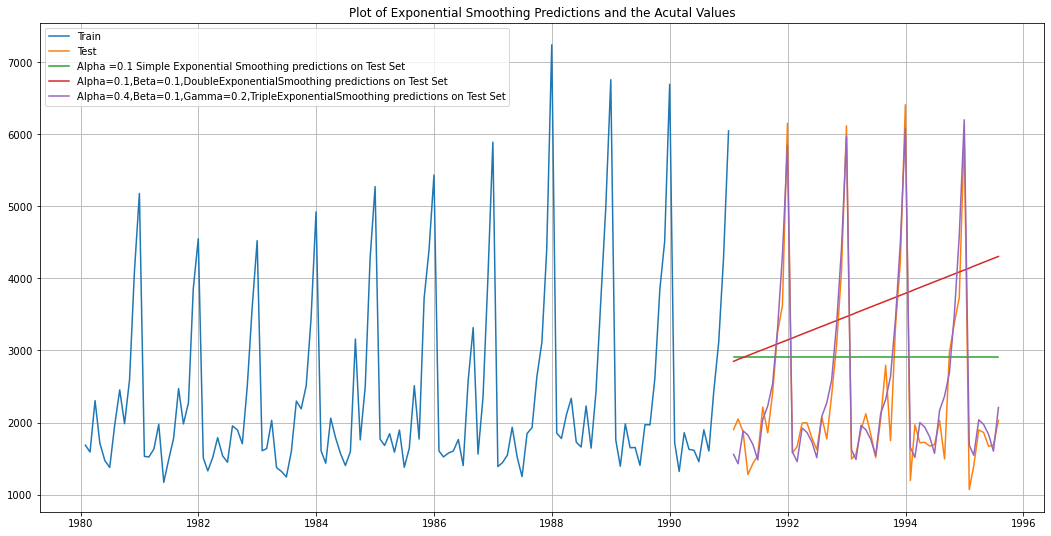

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

# Build model on full dataset using TES:

In [191]:
fullmodel1 = ExponentialSmoothing(df,seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.3)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [192]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 362.64105418312647


In [193]:
# Getting the predictions for the same number of times stamps that are present in the test data

prediction_1 = fullmodel1.forecast(steps=12)

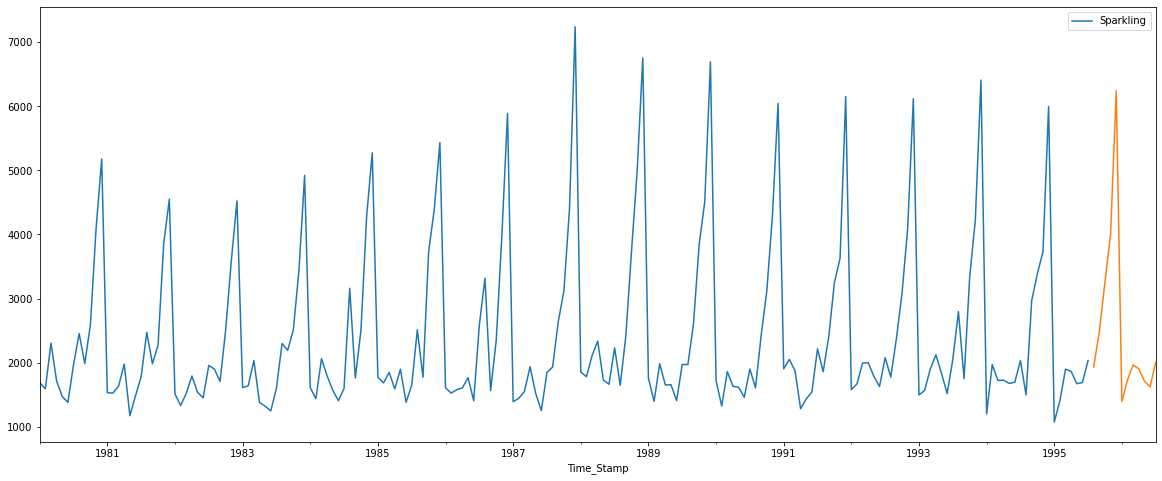

In [194]:
df.plot()
prediction_1.plot();

In [195]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1219.454210  1932.091307  2644.728404
1995-09-30  1772.436250  2485.073348  3197.710445
1995-10-31  2545.800241  3258.437338  3971.074435
1995-11-30  3294.388193  4007.025291  4719.662388
1995-12-31  5529.379864  6242.016962  6954.654059

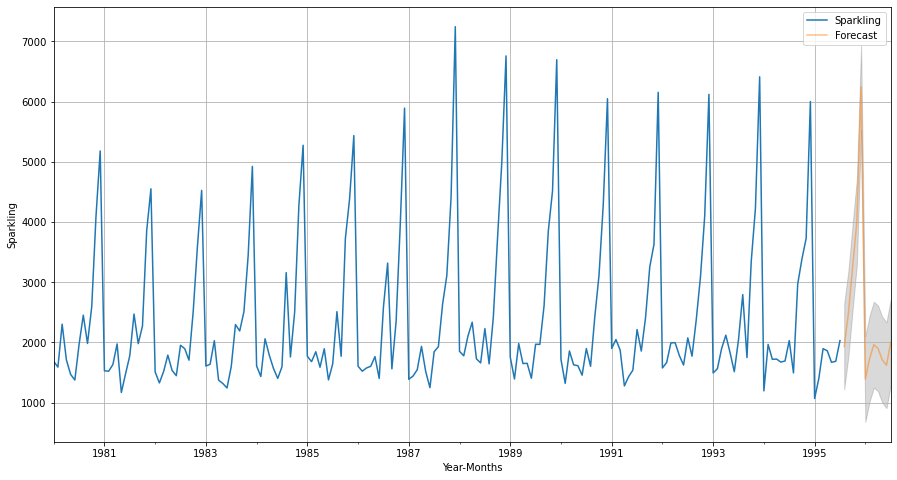

In [196]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

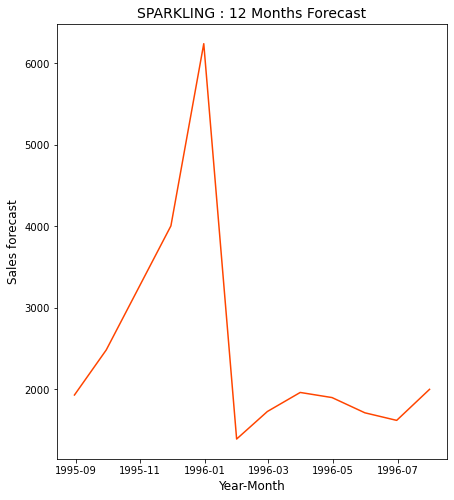

In [199]:
plt.figure(figsize=(7,8))
plt.plot(prediction_1, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

# Check for stationarity of the whole Time Series data:

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

* 𝐻0  : The Time Series has a unit root and is thus non-stationary.

* 𝐻1  : The Time Series does not have a unit root and is thus stationary.
    
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the 𝛼 value.

In [92]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

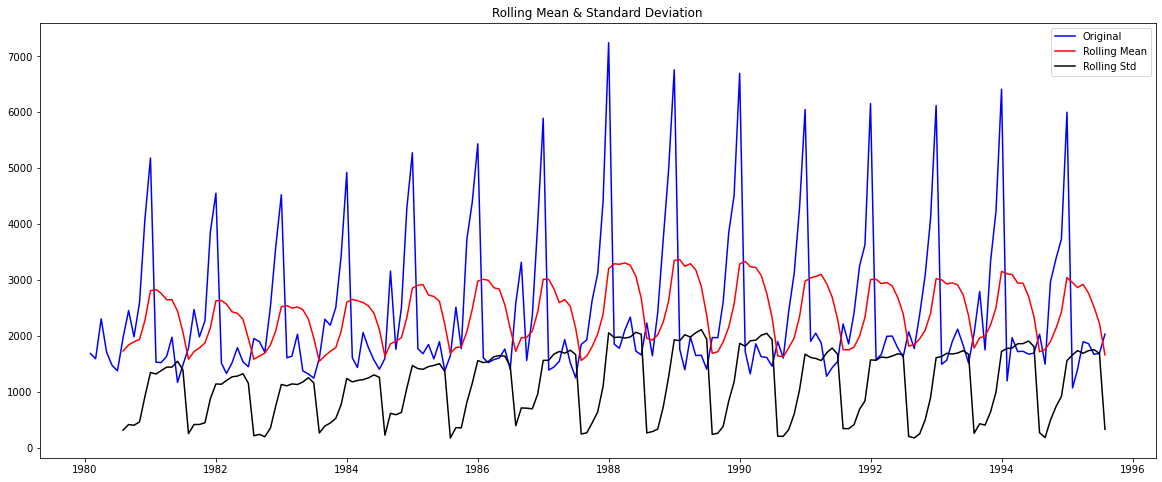

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [93]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

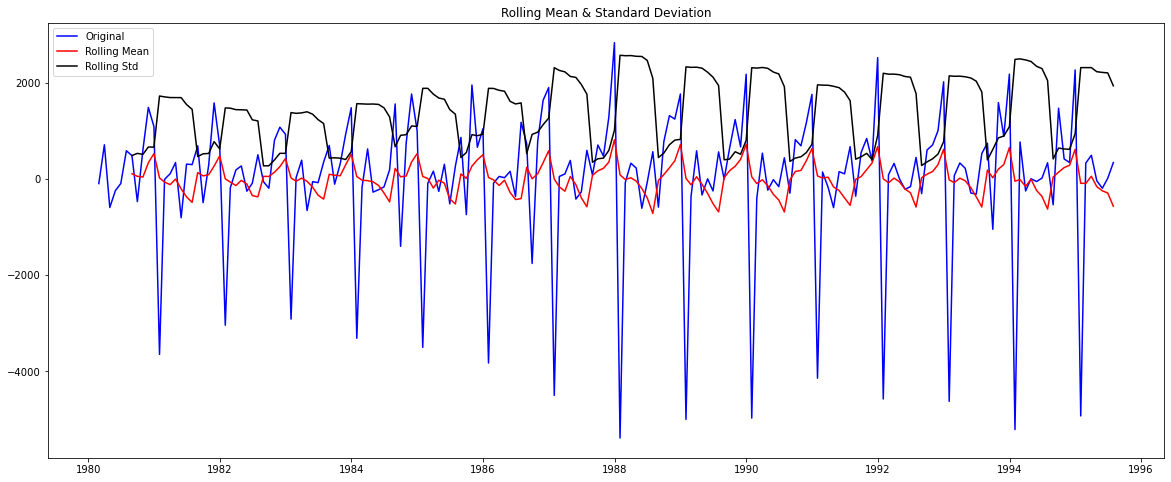

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [94]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at  α  = 0.05 the Time Series is indeed stationary.

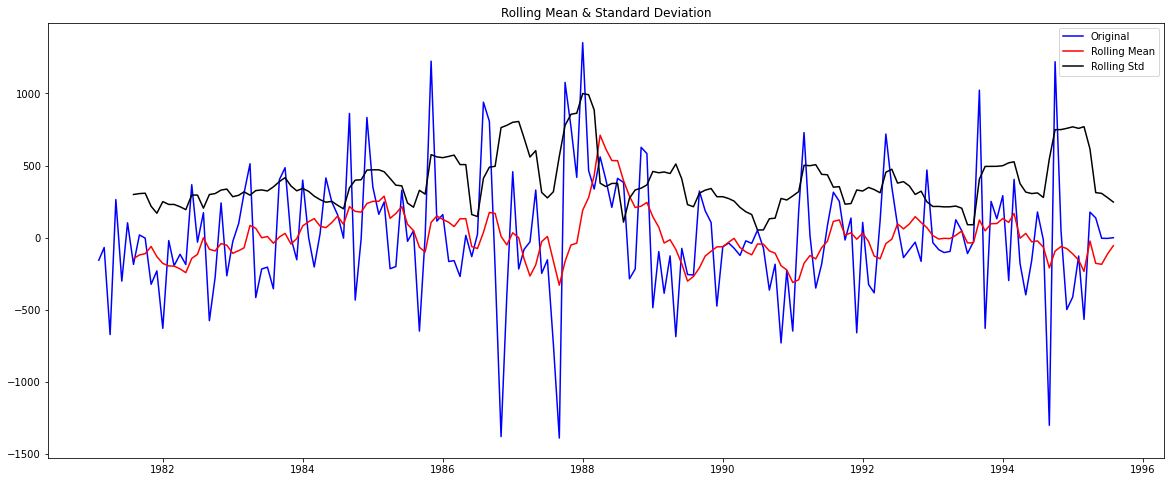

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [99]:
plt.figure(figsize=(20,8))

test_stationarity(df['Sparkling'].diff(12).dropna())

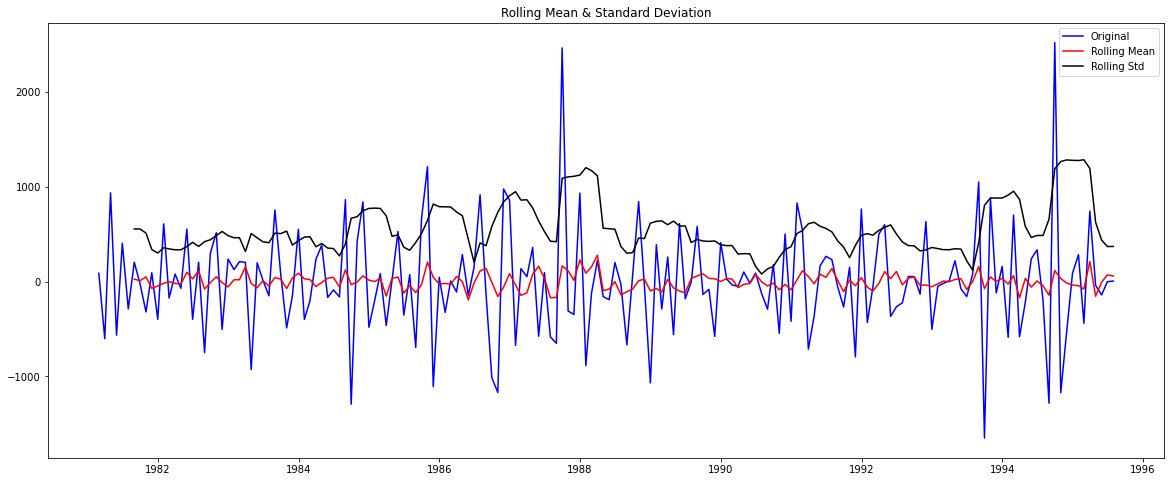

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [100]:
plt.figure(figsize=(20,8))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna())

# Log of series

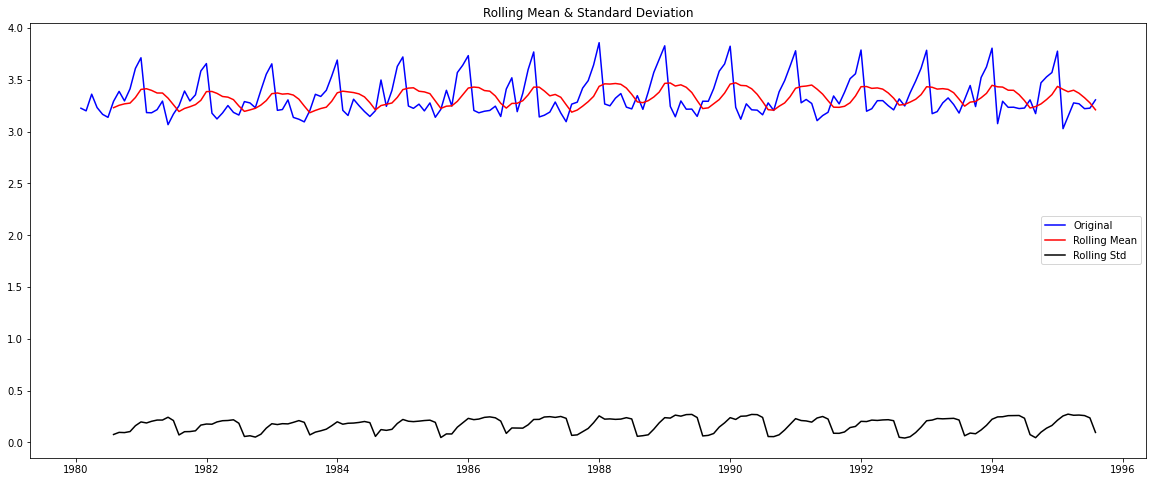

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [98]:
plt.figure(figsize=(20,8))
test_stationarity(np.log10(df['Sparkling']))

Seasonality is now additive but non stationary. Ltes take differencing of log series.

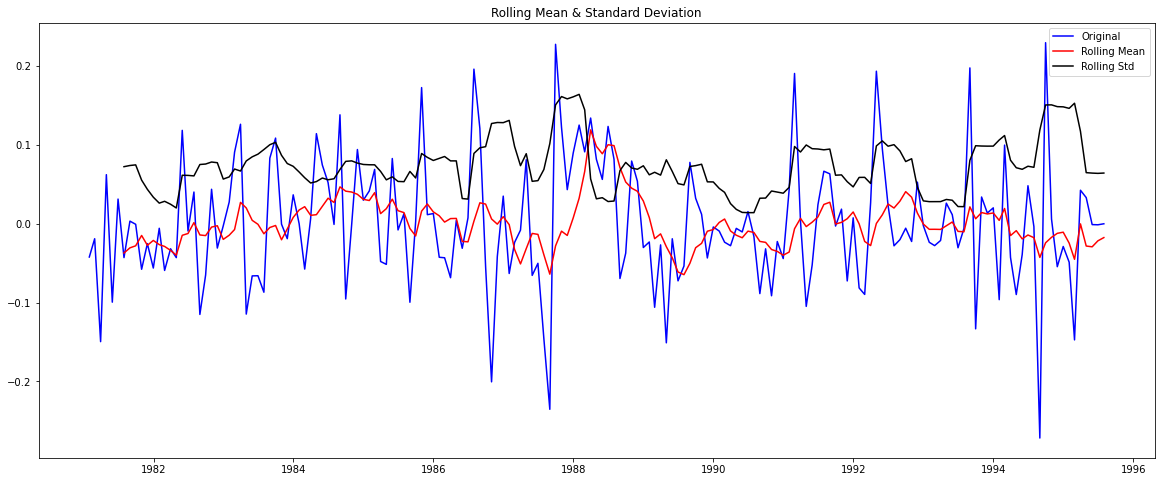

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [101]:
plt.figure(figsize=(20,8))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna())

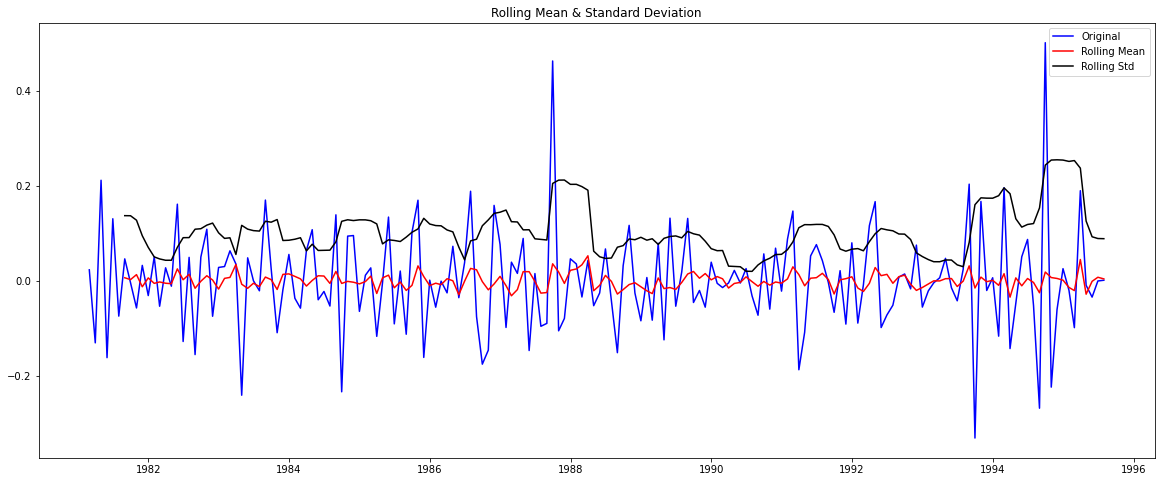

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [102]:
plt.figure(figsize=(20,8))
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna())

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data:

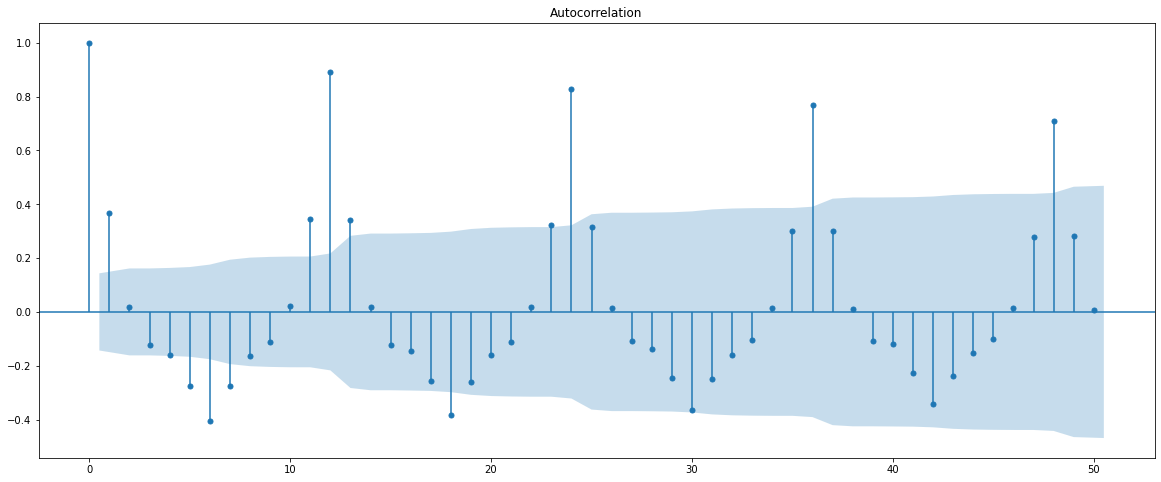

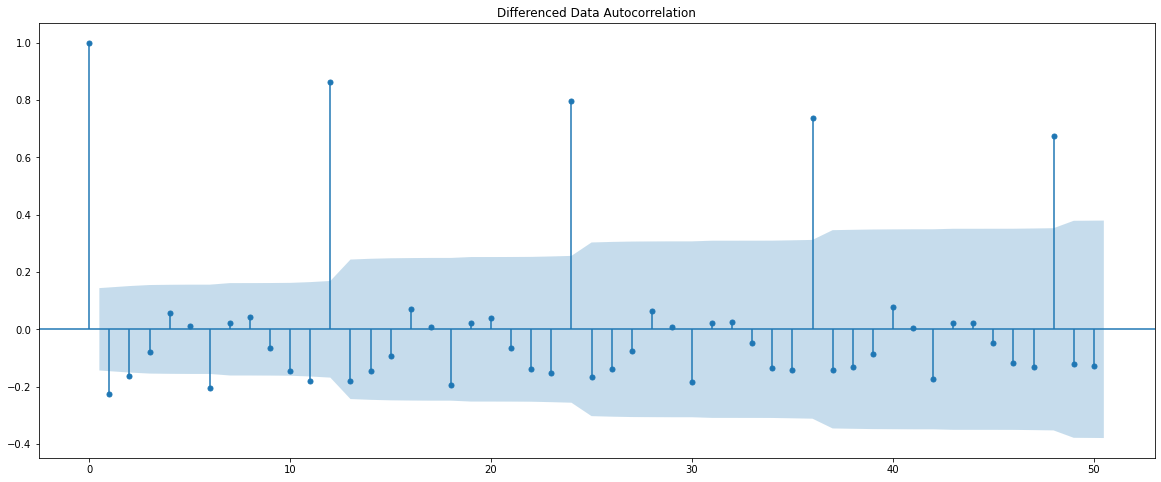

In [95]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


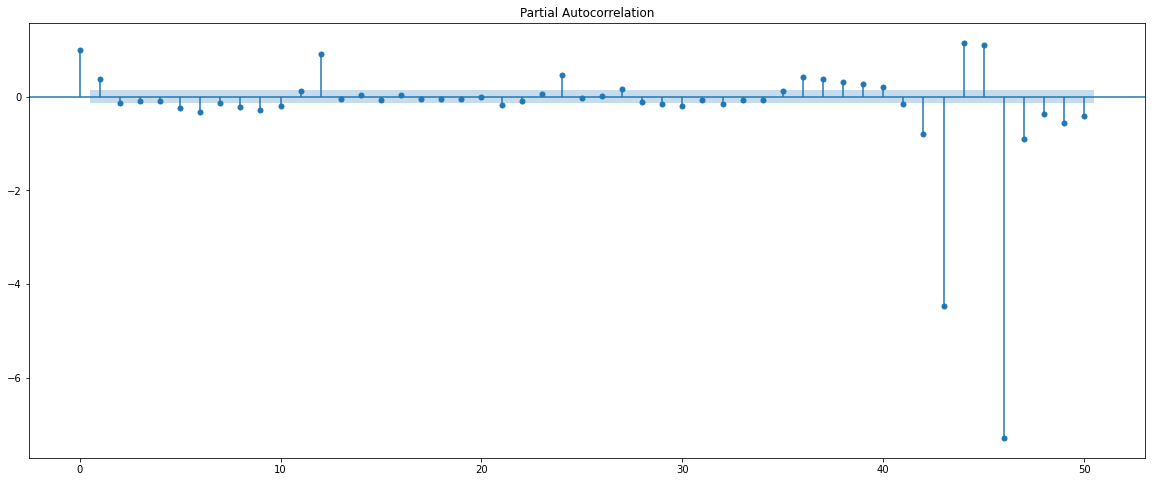

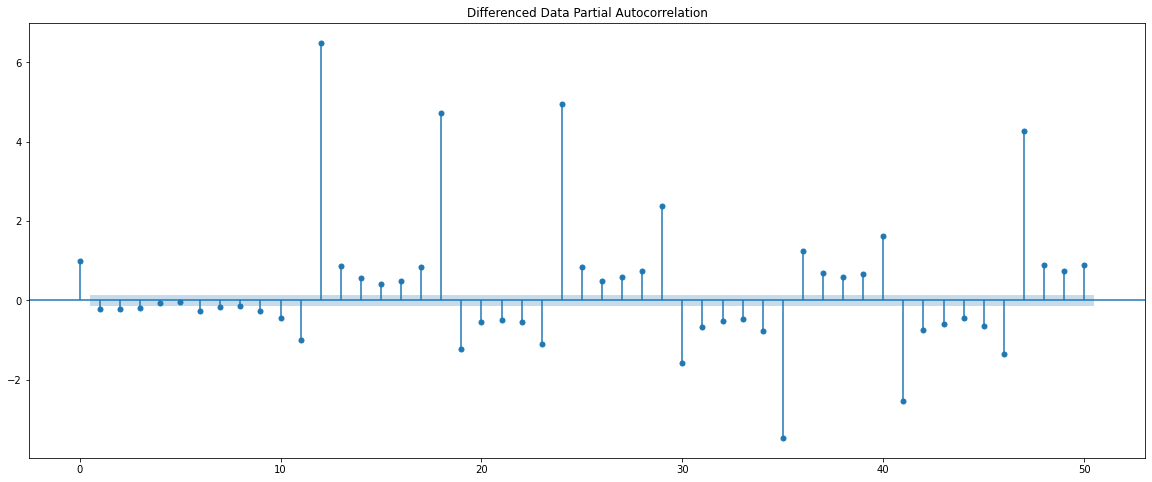

In [96]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be seasonality in the data.

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

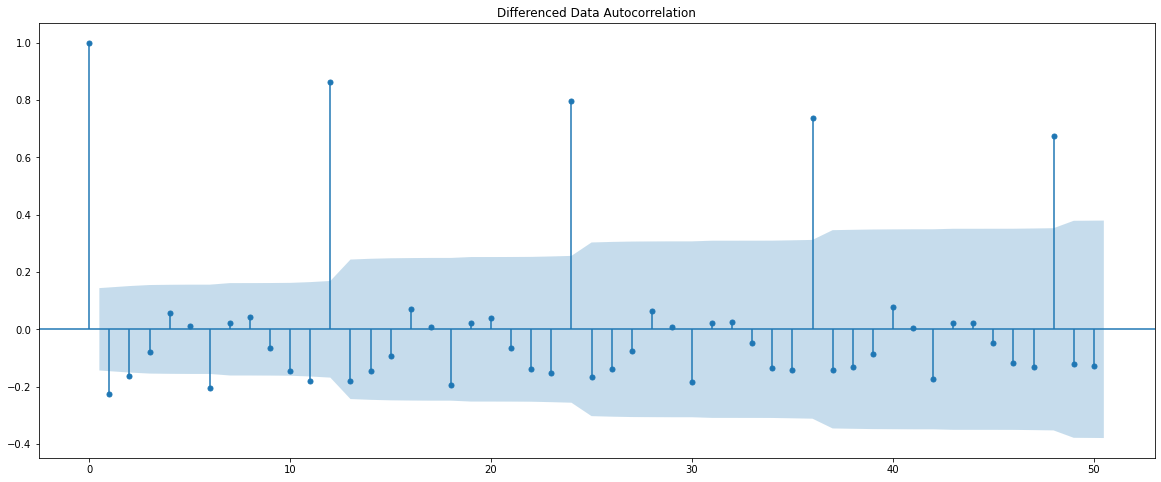

In [117]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

In [105]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [145]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [146]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [147]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678415
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574256222
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3774.697386353774
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908185289
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.52896213077
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:6122.279045505724
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.50009818666
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553664474


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:2743.1434689979183
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094226
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.6070380294968


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:4393.312260349153
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.656571982843
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234229995
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.1083846680262
SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:2676.1897515022283
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023867
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259195672
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524137814


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:471.53738119061524
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.2448811129439
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027963497
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.638588845202


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:87.47572145039693
SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:1255.5784542931788
SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:1257.4558568589252
SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:1258.2925125564673


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:4269.400889903371
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1741.3207220432162
SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.7429039622527
SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.4842540788077


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:2671.9961169995486
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:1601.758729300071
SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.1559716794095
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.3988672021942


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:1010.1644710626226
SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:1427.0773417240337
SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:1428.553476751234
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:1386.0237342755843


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:175.0409573365825
SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:1254.6525579265385
SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:1256.986663401821
SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:1257.425325870301


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:3534.115786526073
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1727.2607378275486
SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:1540.7948184313027
SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:1369.9603671034356


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:2684.559191593281
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:1602.1924100607969
SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:1542.681454045079
SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:1371.7363271385334


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:244.31863412554645
SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:1428.3896856877277
SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:1429.8265181298784
SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:1373.4524731684182


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:3737.0588864869924
SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:1256.002028109907
SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:1258.0747613575033
SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:1258.9452629503166


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:3608.2946025226775
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:1613.7407033409993
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:1441.425999423404
SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:3423.4941790763246
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:1619.6703363508395
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:1615.740448523303
SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:1443.1035528177658


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:6331.599913117324
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:1440.5741628099718
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:1442.5059371246803
SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:1444.4274245939155
SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:6371.142640638794
SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:1265.1747644704742
SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:1267.1592027274637
SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:1263.9849693860826


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:4123.753786169255
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1757.3654162744099
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.382736681285
SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:1398.756167223157
SARIMA(1, 1, 1)x(0, 1, 3, 12)7 - AIC:2752.224984359063
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:1588.0655672689343
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.6724644582011
SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.4523886152938
SARIMA(1, 1, 1)x(1, 1, 3, 12)7 - AIC:6245.137567167268
SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:1413.5679859617283
SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:1414.8736681604048
SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.2732672817235


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12)7 - AIC:16.0
SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:1240.8275546154932
SARIMA(1, 1, 1)x(3, 1, 1, 12)7 - AIC:1242.6640988939075
SARIMA(1, 1, 1)x(3, 1, 2, 12)7 - AIC:1243.1145005243966


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:3829.7541393313195
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.7366275433037
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.9584139012618
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.347780033201


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:2821.4134717904058
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:1585.786090092132
SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.130044171403
SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.1378738619007
SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:6160.832646819412
SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:1411.9924109677265
SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:1413.5918293585225
SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:1385.6887207819798
SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(1, 1, 2)x(3, 1, 0, 12)7 - AIC:1240.439793941152
SARIMA(1, 1, 2)x(3, 1, 1, 12)7 - AIC:1242.3340378002017
SARIMA(1, 1, 2)x(3, 1, 2, 12)7 - AIC:1242.9811907994351


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12)7 - AIC:3676.7189773724485
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1727.0466394223702
SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:1541.6027948032677
SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:1370.660571669371


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:2845.771548581347
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:1587.7824819400628
SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:1544.6047622974456
SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:1372.2143069545032


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:6080.704889939059
SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:1413.9496333394568
SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:1415.5604694469966
SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:1373.71530153863
SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:6145.588058686383
SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:1242.8330948723308
SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:1244.822746770217
SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:1245.4466247004693


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:3320.5990337493695
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:1599.8657465660694
SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:1429.6023214913268


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:3418.7391120817765
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:1590.6714007730502
SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:1587.5144246574816
SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:1431.1873135881524
SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:6322.696176727165
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:1413.6736725425278
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:1415.632429459373
SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:1417.36684729858


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:3713.6045575485773
SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:1240.8917512199291
SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:1242.8745815841535
SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:1242.7991703369225


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:4345.723833323991
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1758.5616376866492
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:1570.1755922610741
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:1400.2098581807777


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:2677.914225878676
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1574.3724067255928
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.8577388007168
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.910419970711
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:6244.541594273158
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.9854069823089
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.992473547245
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183456626862


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766083052
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.148334204762
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.7597823061742


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3533.8657449385432
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930707080573
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467324125458
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645132


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:2602.5043910196323
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644412242
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.120089248773
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.097242007196


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:18.0
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.7756339986947
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.1832161218372
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1387.6277846132703


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:892.8375805456246
SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:1228.397167741184
SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:1230.2093707009976
SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:1230.6856819259121


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:3752.9270150816074
SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1729.0080415017305
SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:1539.887946411512
SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:1368.143156975227


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:2910.004193909078
SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:1571.5669141647327
SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:1539.5113012680704
SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:1369.7747679688368
SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:1396.0596575341035
SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:1397.8640313507067
SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:1370.3569797860462


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:6147.243707443372
SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:1229.4698529295445
SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:1227.825130587236
SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:1229.1523352264153


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:3756.8373691903016
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1761.4099815082702
SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:1600.5023389440123
SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:1430.3126536702562


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:3423.416233179968
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:1576.8309567172184
SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:1574.5127601472122
SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:1431.9534628514239
SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:6310.098527330822
SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:1398.5970048038293
SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:1400.4740803597808
SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:1402.5527499413026
SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:6297.043992285583
SARIMA(3, 1, 0)x(3, 1, 0, 12)7 - AIC:1227.4630824825567
SARIMA(3, 1, 0)x(3, 1, 1, 12)7 - AIC:1229.4324419590982
SARIMA(3, 1, 0)x(3, 1, 2, 12)7 - AIC:1229.1153342162702


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:4271.74909311607
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1744.693937545568
SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:1572.071527967681
SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:1401.6807316910426
SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:2677.979683620243
SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:1561.847797546569
SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:1559.693163194377
SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:1403.3936812911334
SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:18.0
SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:1385.8871646619273
SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:1387.5203747574199
SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:1389.4969785779404
SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:20.0
SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:1215.8987770407346
SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:1217.7138947628403
SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:1218.4160436471698


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:3535.758428060423
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1744.171448731347
SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:1560.2179700052848
SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:1385.8754542226886


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:2529.9572072874976
SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:1563.1682989334754
SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:1559.6863577174179
SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:1387.7123926585818


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:6164.666291237583
SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:1387.888444744458
SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:1387.2131038578138
SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:1389.204666318612


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:6010.382503857894
SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:1216.8591795238067
SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:1218.9913842246765
SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:1219.2599786652659


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:3535.6434288317214
SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1730.9862392223129
SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:1541.428685975943
SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:1372.4124945493083


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:2839.160603119379
SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:1559.5317369687452
SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:1543.6142915517846
SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:1374.311826736825


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:2400.1785013207304
SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:1383.0223091009916
SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:1384.8827589253058
SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:1372.220935394779


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:24.0
SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:1213.2825589158035
SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:1215.213390894184
SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:1216.4799910453482
SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:3682.3009372998936


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [126]:
import statsmodels.api as sm

auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Tue, 21 Dec 2021   AIC                           1213.283
Time:                                     13:42:13   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6148      0.176     -9.179      0.000      -1.960      -1.270
ar.L2         -0.6135      

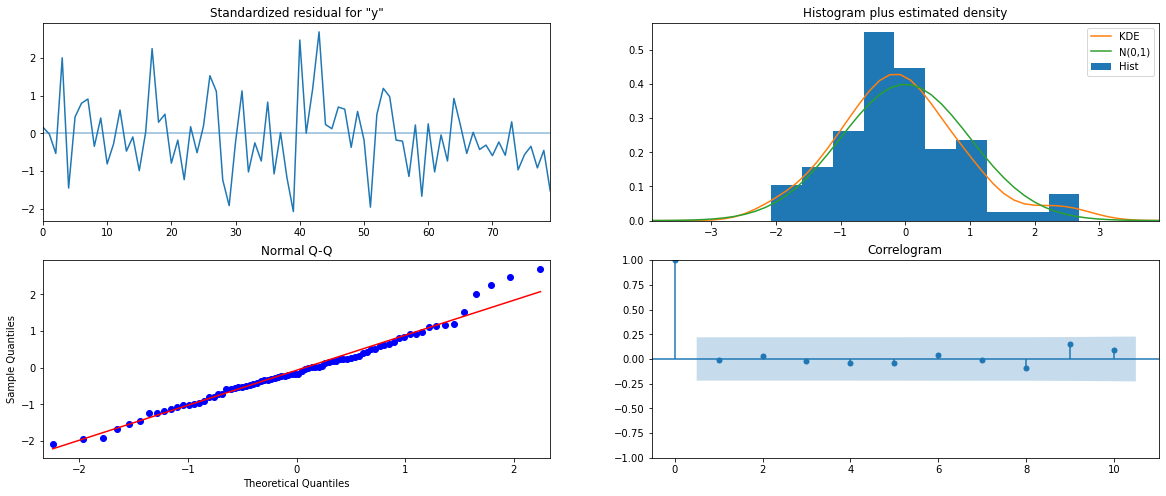

In [127]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model:

In [128]:
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [129]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1431.057046  431.186420     585.947191    2276.166900
1  1540.476216  458.275366     642.273003    2438.679429
2  1707.364368  460.067679     805.648287    2609.080449
3  1858.566788  466.645576     943.958267    2773.175310
4  1501.552990  466.947018     586.353651    2416.752329

In [130]:
rmse_sarima_spark = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_auto_SARIMA_spark.predicted_mean,squared=False)
print(rmse_sarima_spark)

331.7096446744806


In [132]:
temp_results_df = pd.DataFrame({'Test RMSE': [rmse_sarima_spark]}
                           ,index=['SARIMA(3,1,3)(3,1,0,12)'])


results_df = pd.concat([results_df,temp_results_df])

results_df

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExpone...   463.501976
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
SARIMA(3,1,3)(3,1,0,12)                              331.709645

# AUTO SARIMA on Log(Sparkling)

In [135]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

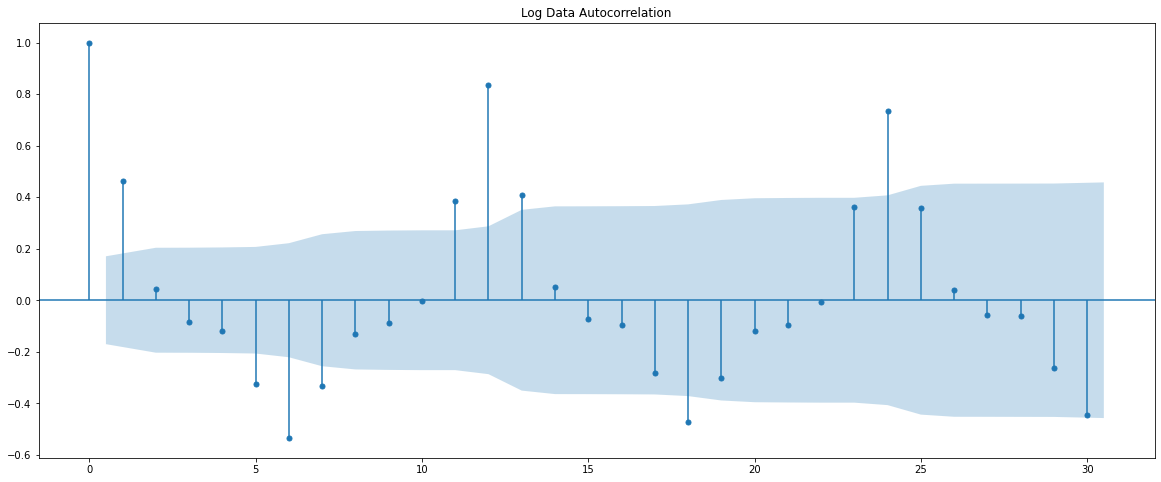

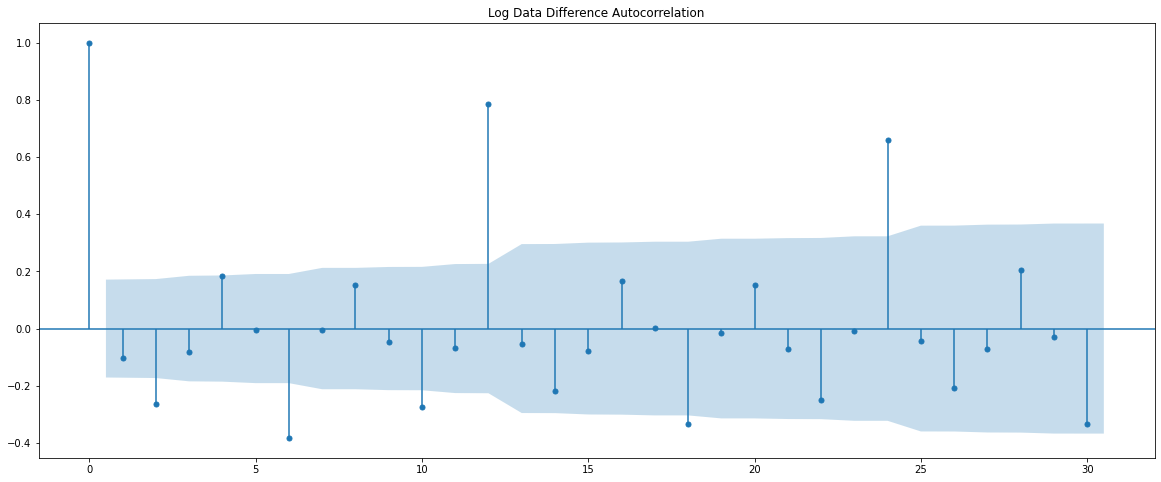

In [136]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

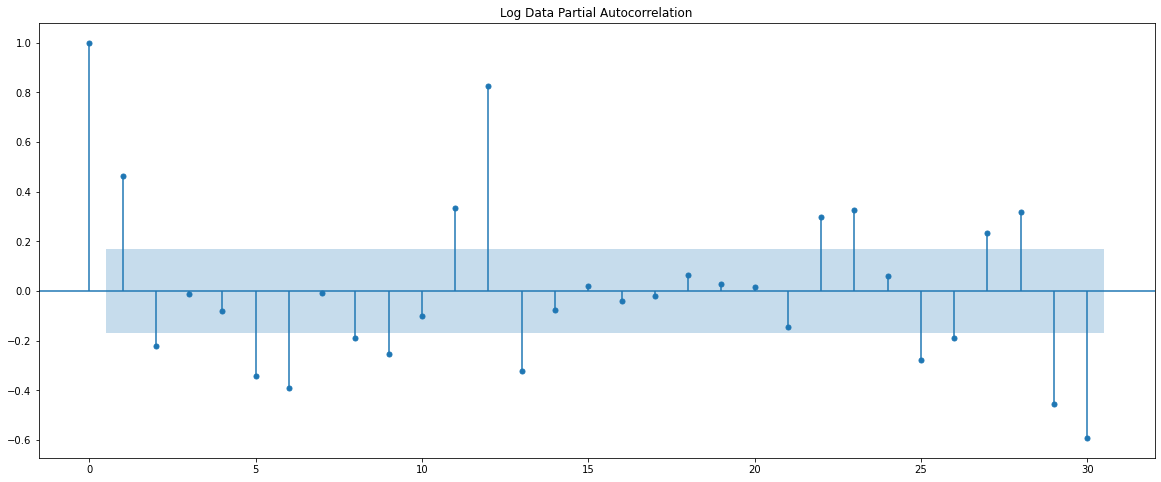

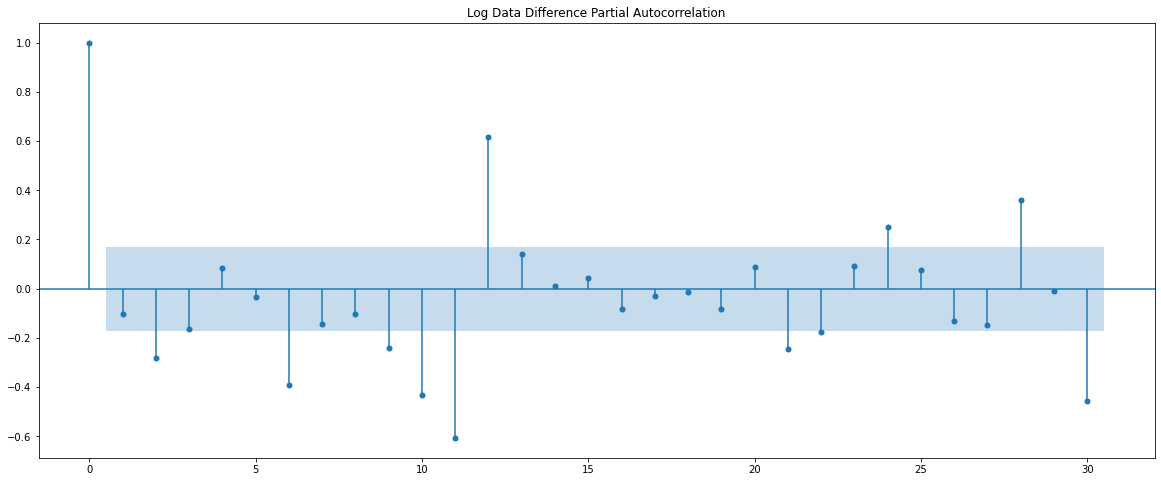

In [137]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [138]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [139]:
SARIMA_AIC_spark_log= pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [140]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.22316326227245
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.8182946997842


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.0730421959754
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064502657775
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.2104086885471


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378254817666
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.19047184960425


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.41328525480495
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.4091359601985


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.6757609804868


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.2889257216336
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722200656


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.30580311659995


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.5990029768502
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797542241415


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.23566705577002


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-170.87276438798852
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-57.79216893671338
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-122.23260707100337


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-138.43622717797666
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-256.10294193200747
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-253.5847629454962


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-218.55896769145855
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-261.54687691209926


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-284.47203155923097


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-244.46391651693375
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-248.20817536353562


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-247.011176499336


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-217.72696374515448
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-246.50642532809155


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-250.67711481226797


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-245.27764720407623


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-220.4538984236701


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-218.54809264257113


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-211.89408871701528
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.16430408121732


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-153.63447324144244


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-164.74663610286646
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-259.921397394933


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-249.2089016586882


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-218.5770531113045
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-266.2376517798473


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-281.56799794732626


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.86560445850515


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-248.0109055300673


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.46916617004422


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-217.11584522870606


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-247.0455536279852


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-248.95185409263252


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-241.811098111499


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-219.96266690903045


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-217.98044526548335


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-213.240541705588
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-56.62659251170257
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.23327150013304


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.12305940964484
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-224.95834567512208
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-223.186451201216

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-189.4787115652286
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-228.63007876962686
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-249.99948140355917


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-214.30021578662453
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-213.86263379949563


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-216.48481538449434


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.43343876660867
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-213.36893551129836


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-214.3426170080511


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-215.10138455045288


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-189.15129878820113


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-187.3824299957917


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-185.46983392640567
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-85.03639777163701


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-149.54590382341706


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-162.40934283275314
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-259.5571086078164


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-252.2829173303374


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-217.36137918055374
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-262.83785079285093


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-282.5173349569953


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-242.9573756463647
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-245.28012054701682

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-245.47599086236886


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-216.42210383172943


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-243.35313335421486


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-246.2835380416352


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-243.80122714729401


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-217.23881915389055


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-215.26243263820592


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.7663380265703
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.29031319948561


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-152.23666239999102


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-162.99564165161587
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-257.95070634875213

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-248.106693826256


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-217.83615353628284


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-263.87479330795793


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-279.6117104449896


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-241.4019873624691


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-244.06388377611287


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.33302931605692


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-216.1356528766016


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-242.37332593739683


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-246.01519553907775
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-240.85868056451352


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-216.277223294899


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-214.39030379307616


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-212.14297991359504
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-64.48764897324476
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-132.5965755715907


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-146.20195933866762
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-232.9842325217041


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-235.64046392443223


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-200.4940604819482
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-235.3092530024001


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-260.8299763791466


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-225.636296153443
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-222.18308697273474


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-225.26416947958282


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-199.46694263668445


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-220.76970992832184


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-223.2302702956264


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-224.34361548699786


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-198.8091735128264


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-196.83111408611956


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-194.94138773788066
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-88.27946166817671


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-154.38039790742934
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-166.2312720391217
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-257.7015033165585

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-250.3725482702357


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.4664432339125
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-257.79087494606216


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-278.28822710279877


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-241.07884738027406


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-240.35091371686497


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-243.47779342372718


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.68152005309233


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.95953125337493


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-240.7471213456381


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-242.0511466823695


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-212.29557496867682


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-210.33407396110965


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-208.7963293148111
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-96.13368007933394


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71504689617885


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168139940638
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.60373934482857


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.596660169372


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805669728156


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.30874760245575


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.88030896814774


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.4094551694793


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33411673552965


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.3498501838274


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22803739911691


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.95688734119315


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.43600160378912


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.10197650244663


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.4584721219532


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49383074843595


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.1488761742969


In [141]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567998
97   (1, 1, 2)  (1, 0, 1, 12) -279.611710
133  (2, 1, 1)  (1, 0, 1, 12) -278.288227

In [149]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Tue, 21 Dec 2021   AIC                           -284.472
Time:                                    15:23:53   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.862      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


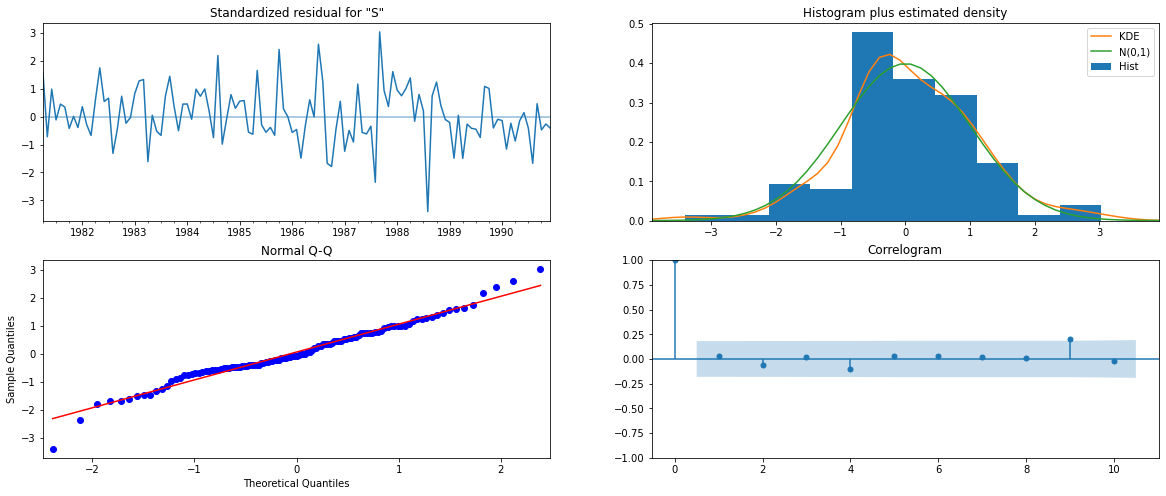

In [150]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model:

In [151]:
SARIMA_test.head()

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [152]:
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [153]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [154]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212031  0.067108       3.080502       3.343560
1991-02-28  3.141307  0.067465       3.009078       3.273535
1991-03-31  3.256285  0.067821       3.123359       3.389211
1991-04-30  3.226731  0.068175       3.093112       3.360351
1991-05-31  3.195787  0.068527       3.061478       3.330097

In [155]:
# Extract the predicted and true values of our time series

spark_log_forecasted = pred_dynamic.predicted_mean

#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10

SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  spark_log_forecasted
Time_Stamp                                 
1991-01-31       1902           1629.412907
1991-02-28       2049           1384.543259
1991-03-31       1874           1804.202248
1991-04-30       1279           1685.509921
1991-05-31       1432           1569.594185

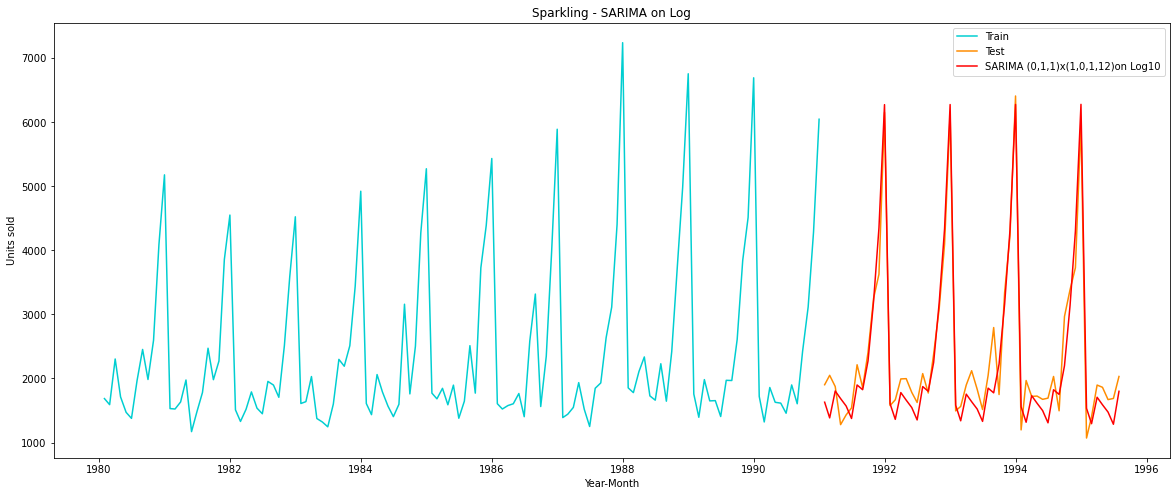

In [156]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best')

In [158]:
rmse_SARIMA_log_spark = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
print(rmse_SARIMA_log_spark)

336.80098152127516


In [159]:
temp_results_df2 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_log_spark]}
                           ,index=['SARIMA(0, 1, 1),(1, 0, 1, 12)'])


results_df = pd.concat([results_df,temp_results_df2])

results_df

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExpone...   463.501976
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
SARIMA(3,1,3)(3,1,0,12)                              331.709645
SARIMA(0, 1, 1),(1, 0, 1, 12)                        336.800982

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots at seasonality 12:

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


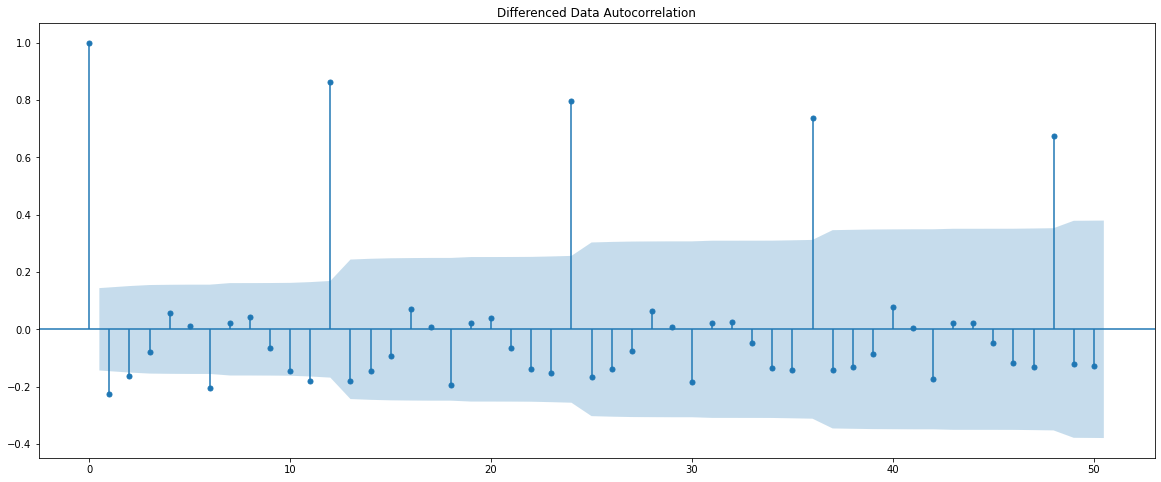

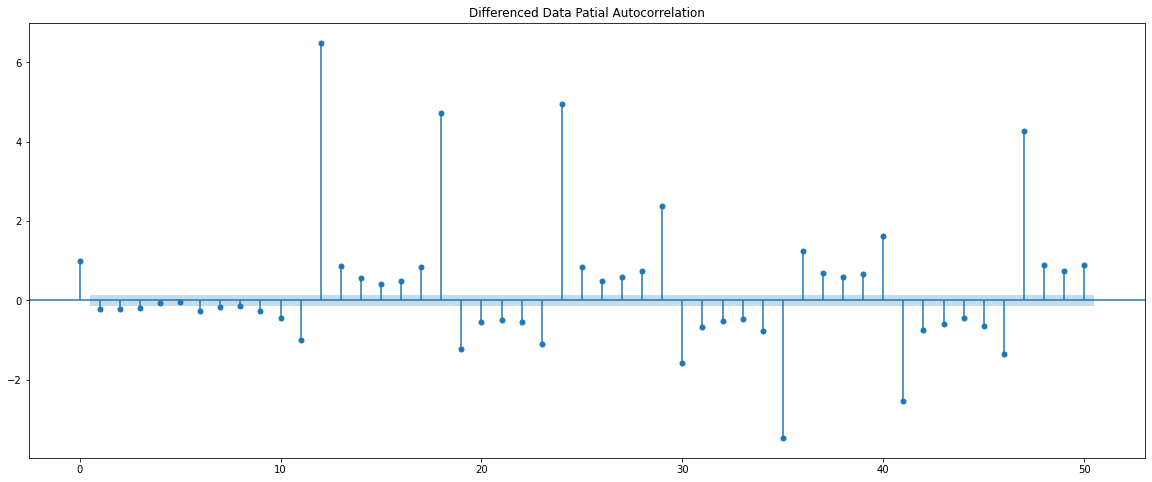

In [139]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

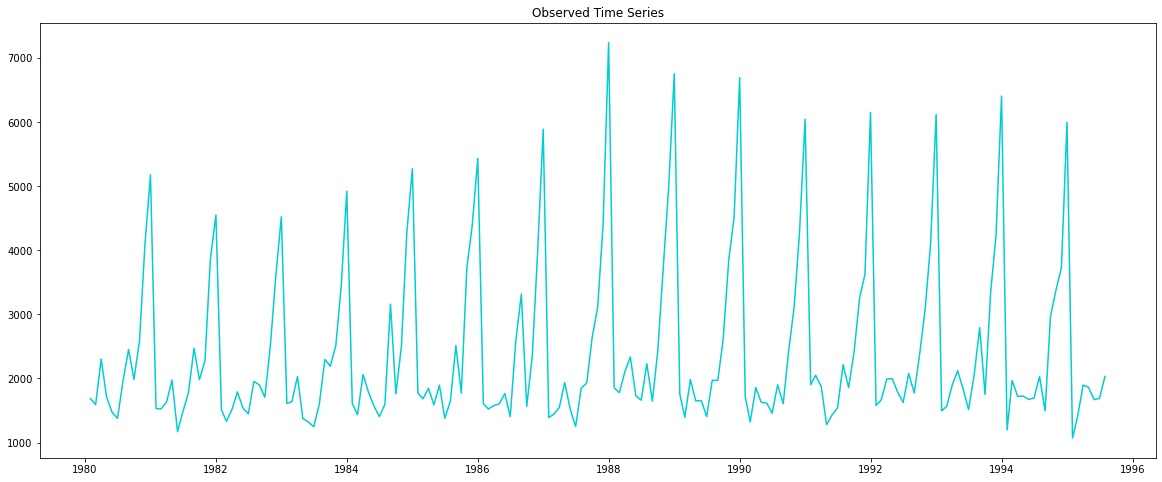

In [160]:
plt.figure(figsize=(20,8))
plt.plot(df['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

We see that there is marginal trend and but have significant seasonality. So, now we take a seasonal differencing and check the series.

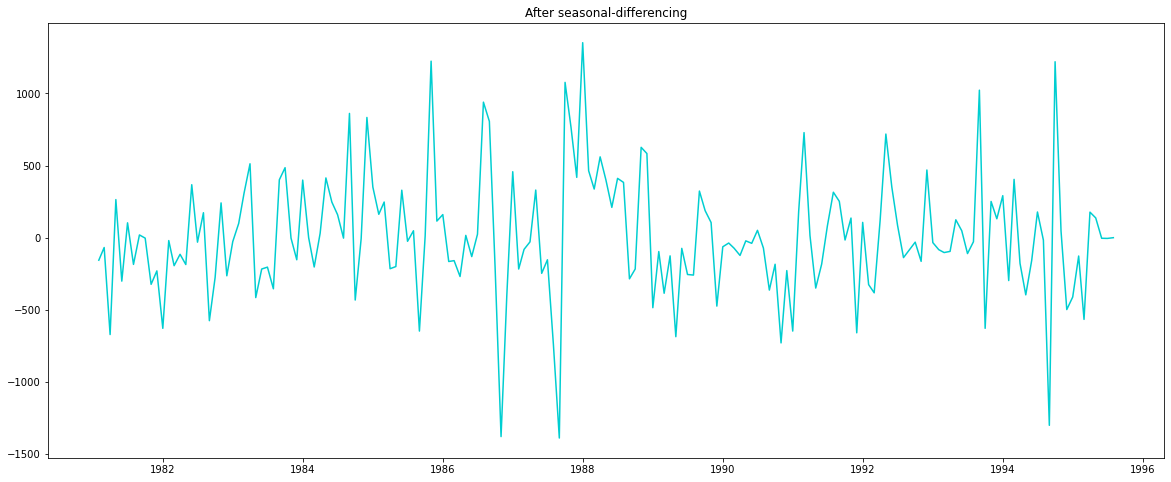

In [161]:
plt.figure(figsize=(20,8))
plt.plot(df['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

The marginal trend in the data is still seen.

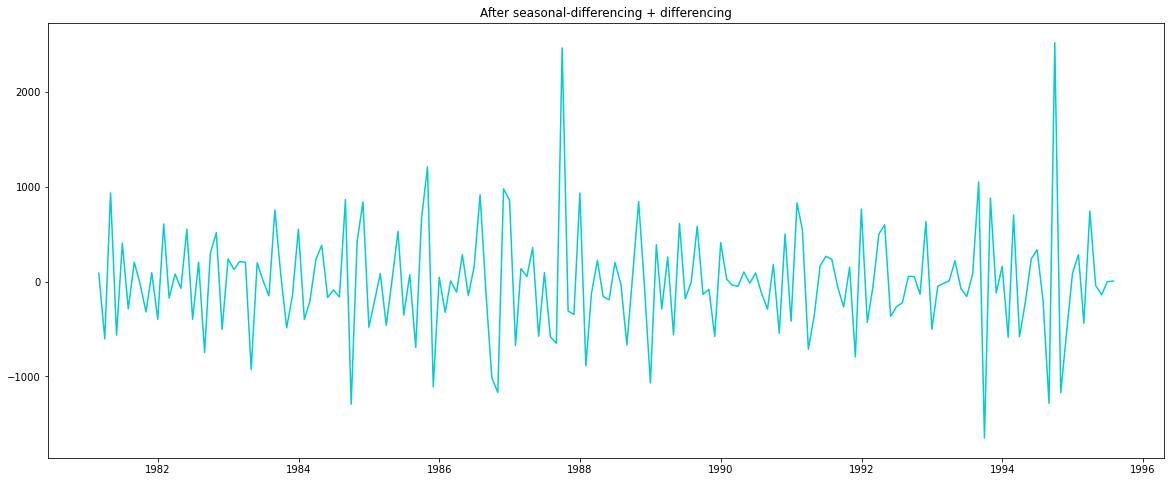

In [162]:
plt.figure(figsize=(20,8))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

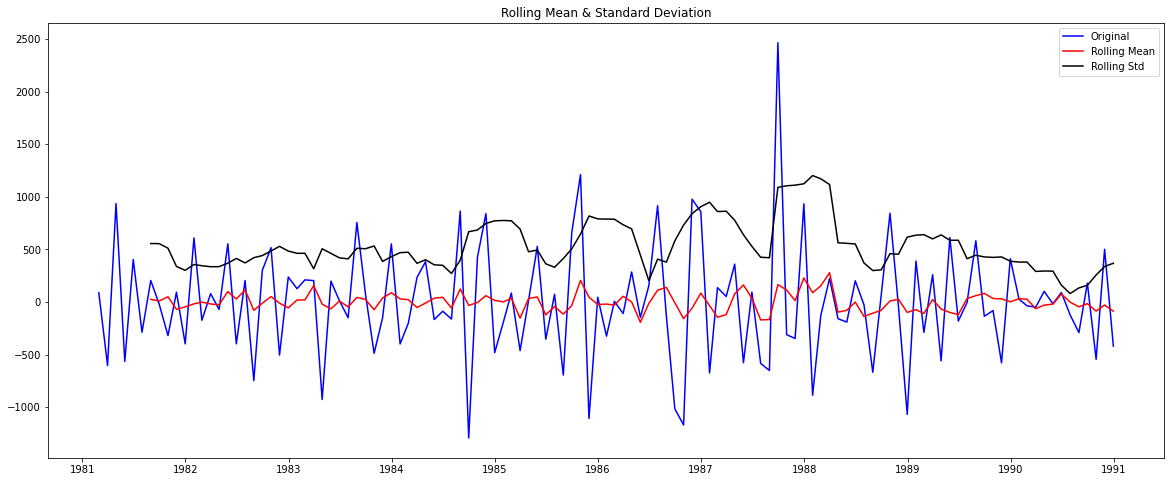

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [164]:
plt.figure(figsize=(20,8))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna())

Checking the ACF and the PACF plots for the new modified Time Series:

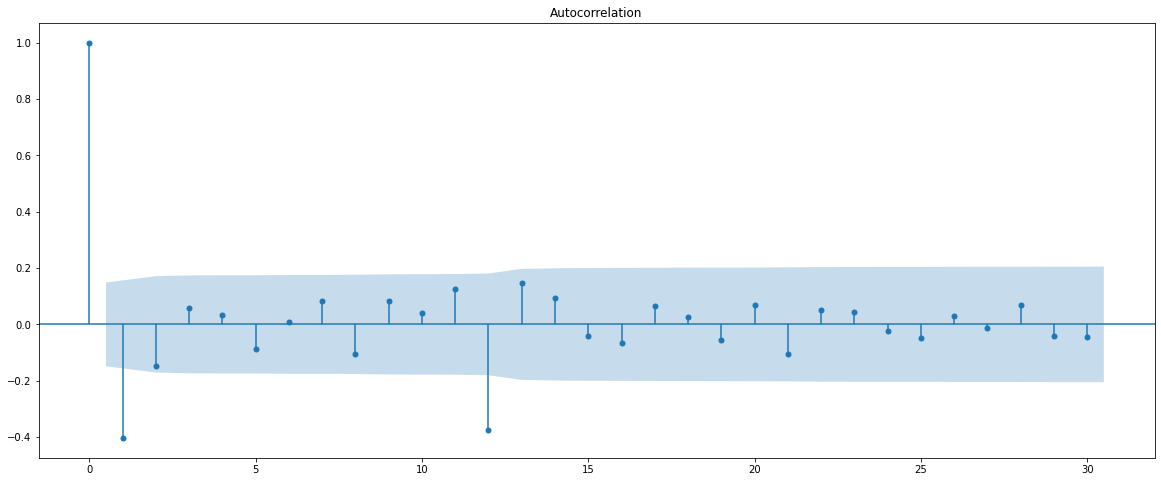

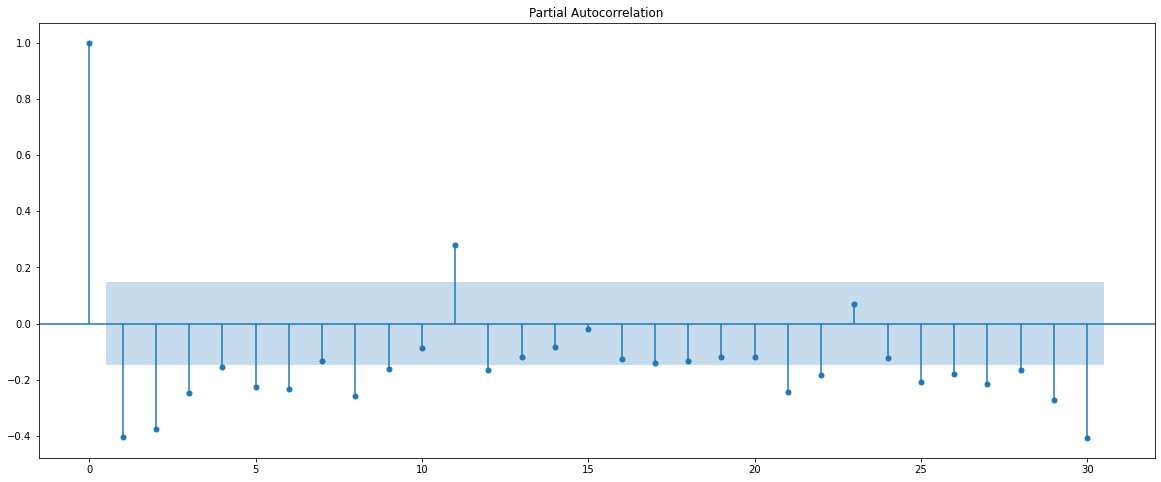

In [165]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [166]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Tue, 21 Dec 2021   AIC                           1403.394
Time:                                         15:35:41   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

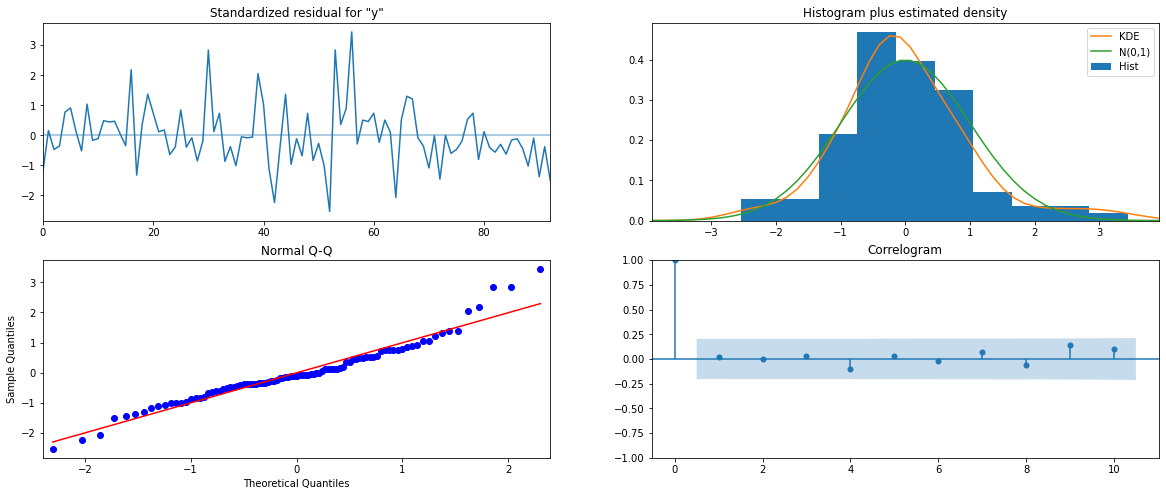

In [167]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model:

In [168]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [169]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [170]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.913297  416.594903     763.402292    2396.424302
1  1419.160142  429.114450     578.111274    2260.209010
2  1868.150621  429.105090    1027.120099    2709.181143
3  1731.477674  430.973592     886.784956    2576.170392
4  1659.828440  431.906503     813.307249    2506.349630

In [171]:
# Extract the predicted and true values of our time series

spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_log_forecasted  spark_manual_forecasted
Time_Stamp                                                          
1991-01-31       1902           1629.412907              1579.913297
1991-02-28       2049           1384.543259              1419.160142
1991-03-31       1874           1804.202248              1868.150621
1991-04-30       1279           1685.509921              1731.477674
1991-05-31       1432           1569.594185              1659.828440

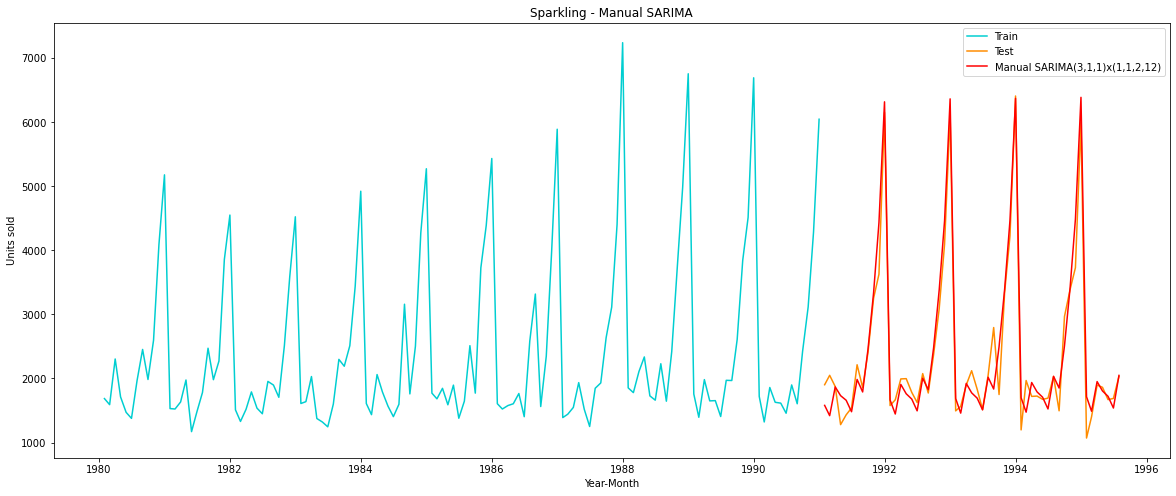

In [172]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [173]:
rmse_Manual_SARIMA = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
print(rmse_Manual_SARIMA)

324.1085440270076


In [174]:
temp_results_df3 = pd.DataFrame({'Test RMSE': [rmse_Manual_SARIMA]}
                           ,index=['SARIMA(3,1,1)(1,1,2,12)'])


results_df = pd.concat([results_df,temp_results_df3])

results_df

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExpone...   463.501976
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
SARIMA(3,1,3)(3,1,0,12)                              331.709645
SARIMA(0, 1, 1),(1, 0, 1, 12)                        336.800982
SARIMA(3,1,1)(1,1,2,12)                              324.108544

In [175]:
results_df

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExpone...   463.501976
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
SARIMA(3,1,3)(3,1,0,12)                              331.709645
SARIMA(0, 1, 1),(1, 0, 1, 12)                        336.800982
SARIMA(3,1,1)(1,1,2,12)                              324.108544

# Building the most optimum model on the Full Data:

In [177]:
results_df.sort_values(by=['Test RMSE'])

Test RMSE
SARIMA(3,1,1)(1,1,2,12)                              324.108544
SARIMA(3,1,3)(3,1,0,12)                              331.709645
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
SARIMA(0, 1, 1),(1, 0, 1, 12)                        336.800982
Alpha=0.110,Beta=0.060,Gamma=0.391,TripleExpone...   463.501976
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
6pointTrailingMovingAverage                         1283.927428
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

This particular dataset has seasonality component. If we go by RMSE values of test data, SARIMA(3,1,1)(1,1,2,12) is giving low RMSE. Hence, we will go ahead and use this model to forecast next 12 months using full data.

In [181]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,1),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1094.342
Date:                                 Tue, 21 Dec 2021   AIC                           2204.685
Time:                                         15:46:19   BIC                           2228.662
Sample:                                     01-31-1980   HQIC                          2214.427
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1159      0.086      1.349      0.177      -0.052       0

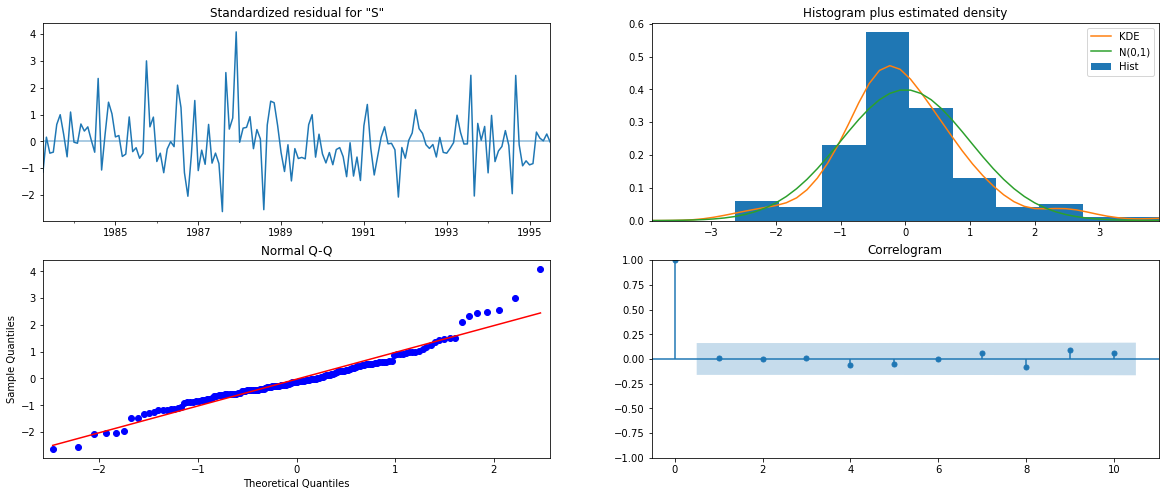

In [182]:
results_full_data_model_spark.plot_diagnostics();

# Evaluate the model on the whole and predict 12 months into the future:

In [183]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [184]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1870.888606  390.915189    1104.708915    2637.068297
1995-09-30  2489.623595  395.293842    1714.861902    3264.385288
1995-10-31  3299.650018  395.322870    2524.831431    4074.468604
1995-11-30  3934.056632  396.282360    3157.357479    4710.755784
1995-12-31  6135.396042  396.768708    5357.743665    6913.048419

In [185]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_spark_sarima_full)

RMSE of the Full Model 547.5914048752587


In [186]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31',freq='M'))

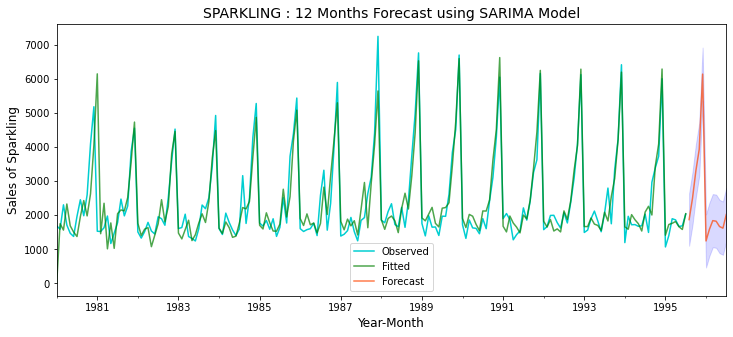

In [187]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

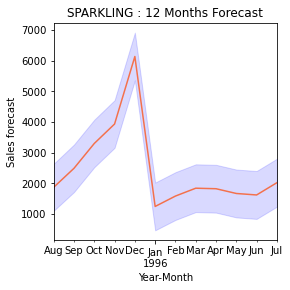

In [188]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [189]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1870.89
1995-09-30    2489.62
1995-10-31    3299.65
1995-11-30    3934.06
1995-12-31    6135.40
1996-01-31    1245.73
1996-02-29    1584.64
1996-03-31    1840.71
1996-04-30    1823.85
1996-05-31    1668.71
1996-06-30    1620.47
1996-07-31    2020.53

In [190]:
forecast.describe()

Sparkling
count    12.000000
mean   2461.188333
std    1391.119210
min    1245.730000
25%    1656.650000
50%    1855.800000
75%    2692.127500
max    6135.400000

# Inferences:

* The model forecasts average sale of 2461 units of sparkling wine per month. It means model forecasts sale of 29,527 units of sparkling wine in 12 months into future.

* The seasonal sale in December 1995 will hit a maximum of 6135 units before it drops to the lowest sale of 1245 in January 1996.

* The wine company is recommended to ramp up their procurement and production line in accordance with the above forecast for the fourth quarter of 1995 (October, November, December) which is a total of 13,368.

* The forecast also indicates that the year on year sale of sparkling wine is not showing an upward trend. The winery must adopt some innovative marketing skills to improve the sale compared to previous years.

* Adding more exogenous variables to time series data can improve the forecasts.

* Business can also study which wineproduct has substituted/ had higher sales in the years of low sales of Sparkling. With promotion and focussed effort with micro detailing it may be feasible to increase the sales.